# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Домашнее задание 1. Cвойства оценок
### Дедлайн --- 8 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook (colab):

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

## Важно

Перед отправкой проверьте, что весь ваш код выполняется без ошибок, если во время проверки после последовательного перезапуска ячеек что-то пойдет не так, то задание может быть оценено в 0 баллов.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid', font_scale=1.4)
%matplotlib inline
%config InlineBackend.figure_format="retina"  # only for retina display

Зафиксируем `seed` для воспроизводимости.

In [ ]:
np.random.seed(42)

### Задача 1

Сгенерируйте выборку $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [ ]:
#N = 1e4 # use this 
N = 10000
def generate(theta): 
  return np.random.uniform(0, theta, N)

In [ ]:
my_theta = 1
samples = generate(my_theta)

Для всех $n \leqslant N$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

In [ ]:
# вспомогательные статистики
sample_mean = np.cumsum(samples, axis=0) / (np.arange(N)+1)
maximum = np.maximum.accumulate(samples, axis=0)
minimum = np.minimum.accumulate(samples, axis=0)
# необходимые оценки
double_sample_mean = 2 * sample_mean
estimator2 = sample_mean + maximum / 2
estimator3 = minimum * (np.arange(N) + 2)
estimator4 = minimum + maximum
estimator5 = maximum * (np.arange(N) + 2) / (np.arange(N) + 1)

Постройте на одном графике разными цветами для всех оценок функции модуля разности оценки и истинного значения $\theta$ в зависимости от $n$. Если некоторые оценки (при фиксированном значении $n$) сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (для измененного значения $\theta$). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки лучше соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

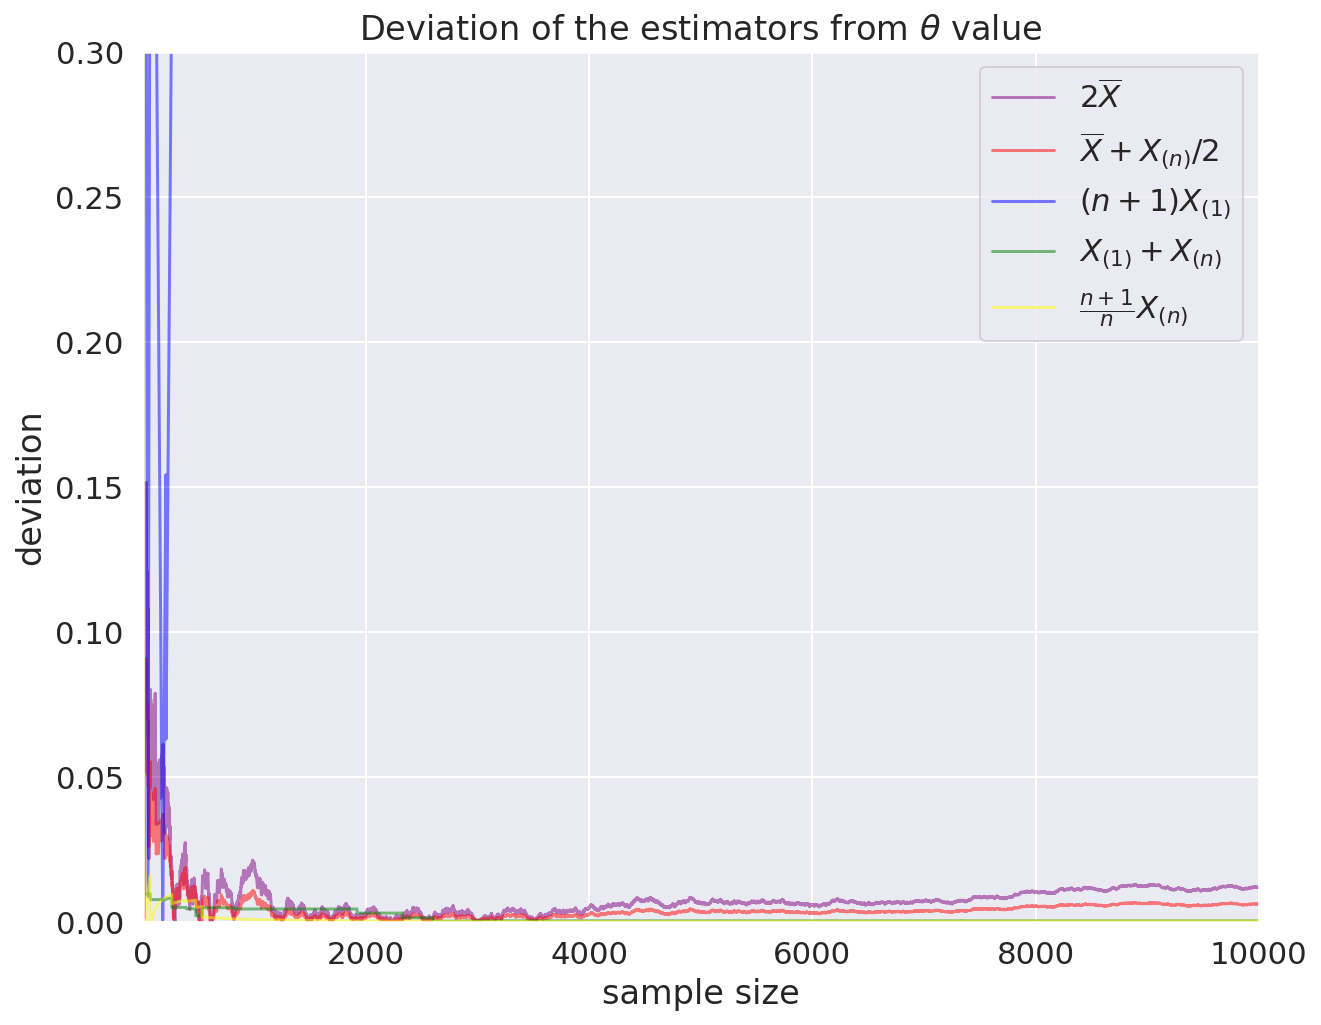

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(10,8))
plt.title("Deviation of the estimators from"+r' $\theta$'+" value")

plt.plot(range(N), np.abs(double_sample_mean - my_theta), alpha=0.5, color="purple", label='2$\overline{X}$')
plt.plot(range(N), np.abs(estimator2 - my_theta), alpha=0.5, color="red", label='$\overline{X}+X_{(n)}/ 2$')
plt.plot(range(N), np.abs(estimator3 - my_theta), alpha=0.5, color="blue", label='$(n+1)X_{(1)}$')
plt.plot(range(N), np.abs(estimator4 - my_theta), alpha=0.5, color="green", label='$X_{(1)}+X_{(n)}$')
plt.plot(range(N), np.abs(estimator5 - my_theta), alpha=0.5, color="yellow", label=r'$ \frac{n+1}{n}  X_{(n)}$')
plt.xlim(0, N)
plt.ylim(0, 0.3)
plt.xlabel("sample size")
plt.ylabel("deviation")
plt.legend()
plt.show()

Как мы видим, оценка $(n+1)X_{(1)}$ очень плохо приближает $\theta$. Уберем ее и увеличим масштаб графика, чтобы проанализировать другие оценки.

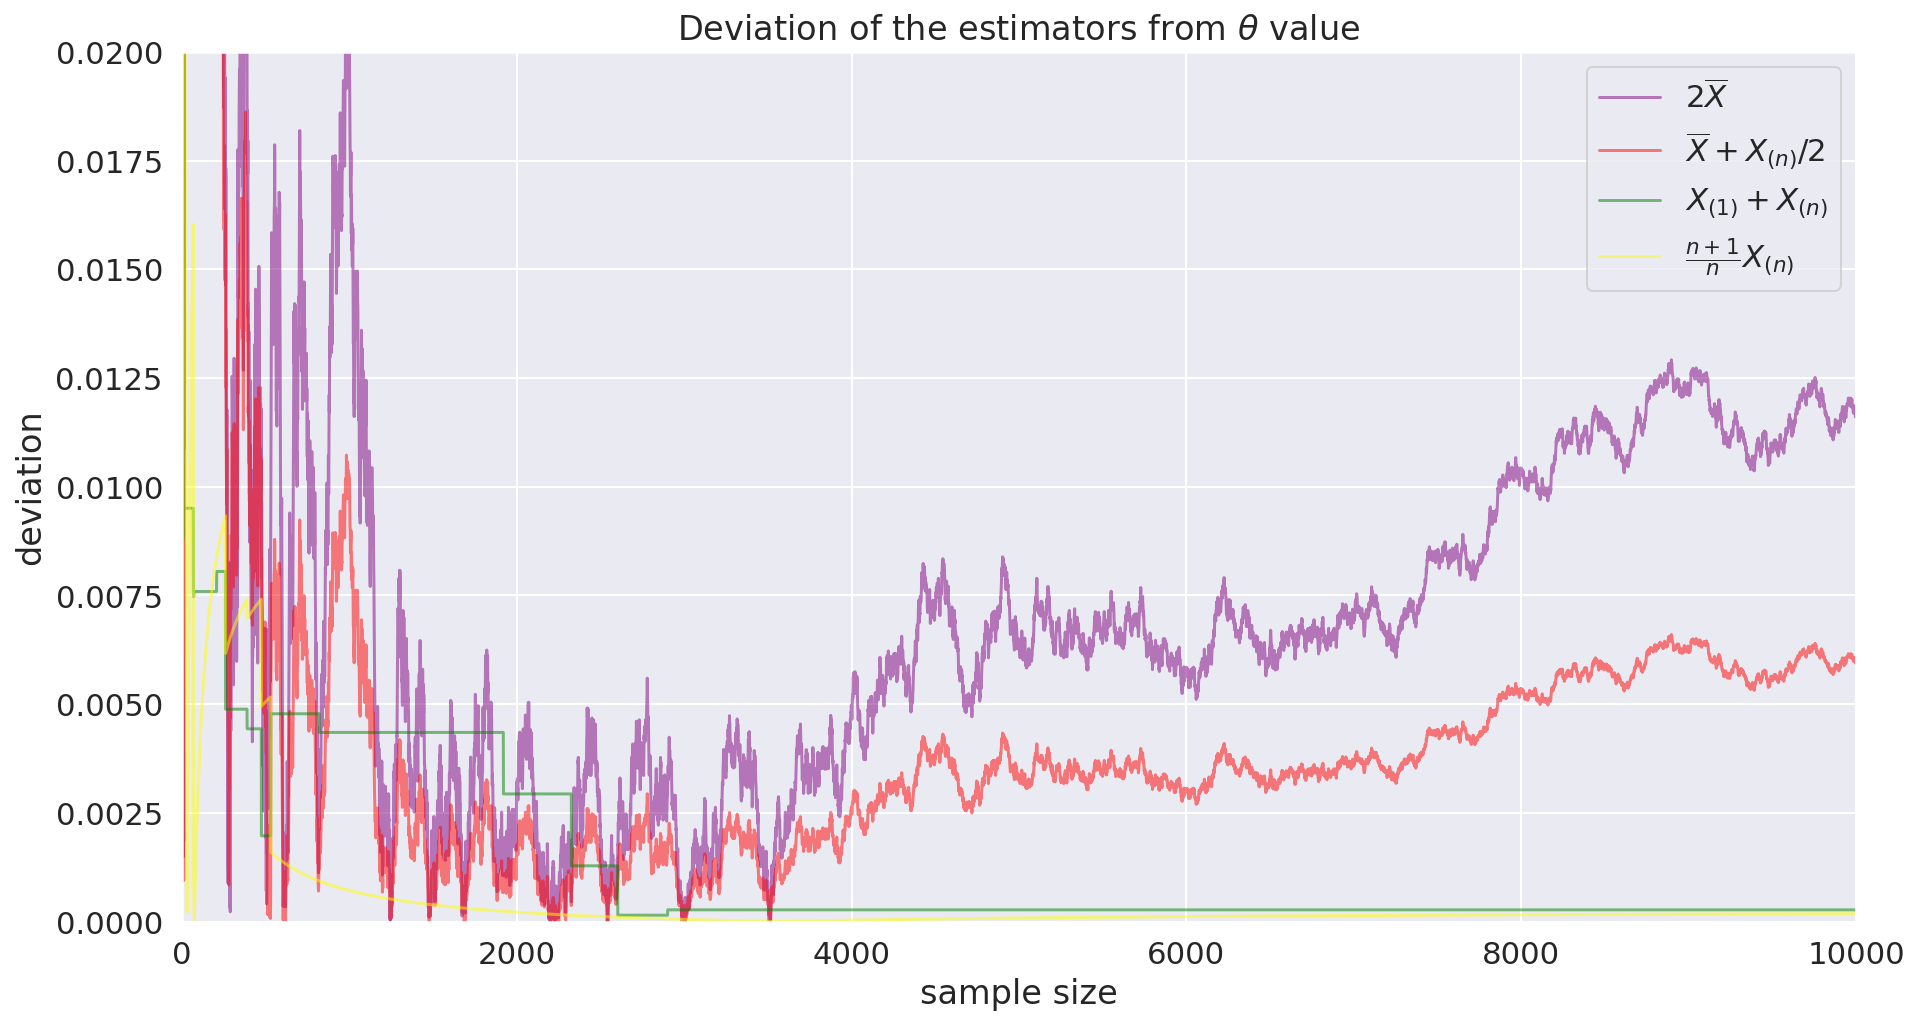

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(15,8))
plt.title("Deviation of the estimators from"+r' $\theta$'+" value")

plt.plot(range(N), np.abs(double_sample_mean - my_theta), alpha=0.5, color="purple", label='2$\overline{X}$')
plt.plot(range(N), np.abs(estimator2 - my_theta), alpha=0.5, color="red", label='$\overline{X}+X_{(n)}/ 2$')
plt.plot(range(N), np.abs(estimator4 - my_theta), alpha=0.5, color="green", label='$X_{(1)}+X_{(n)}$')
plt.plot(range(N), np.abs(estimator5 - my_theta), alpha=0.5, color="yellow", label=r'$\frac{n+1}{n}  X_{(n)}$')
plt.xlim(0, N)
plt.ylim(0, 0.02)
plt.xlabel("sample size")
plt.ylabel("deviation")
plt.legend()
plt.show()

Какая оценка получилась лучше (в смысле упомянутого модуля разности при $n = N$)?

__Ответ:__ Наиболее эффективная оценка - $(n+1)/n * X_{(n)}$, и с ростом выборки ее отклонение от истинного значения $\theta$ стремится к 0. Также хорошо приближает $\theta$ и оценка $X_{(1)}+X_{(n)}$.



Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

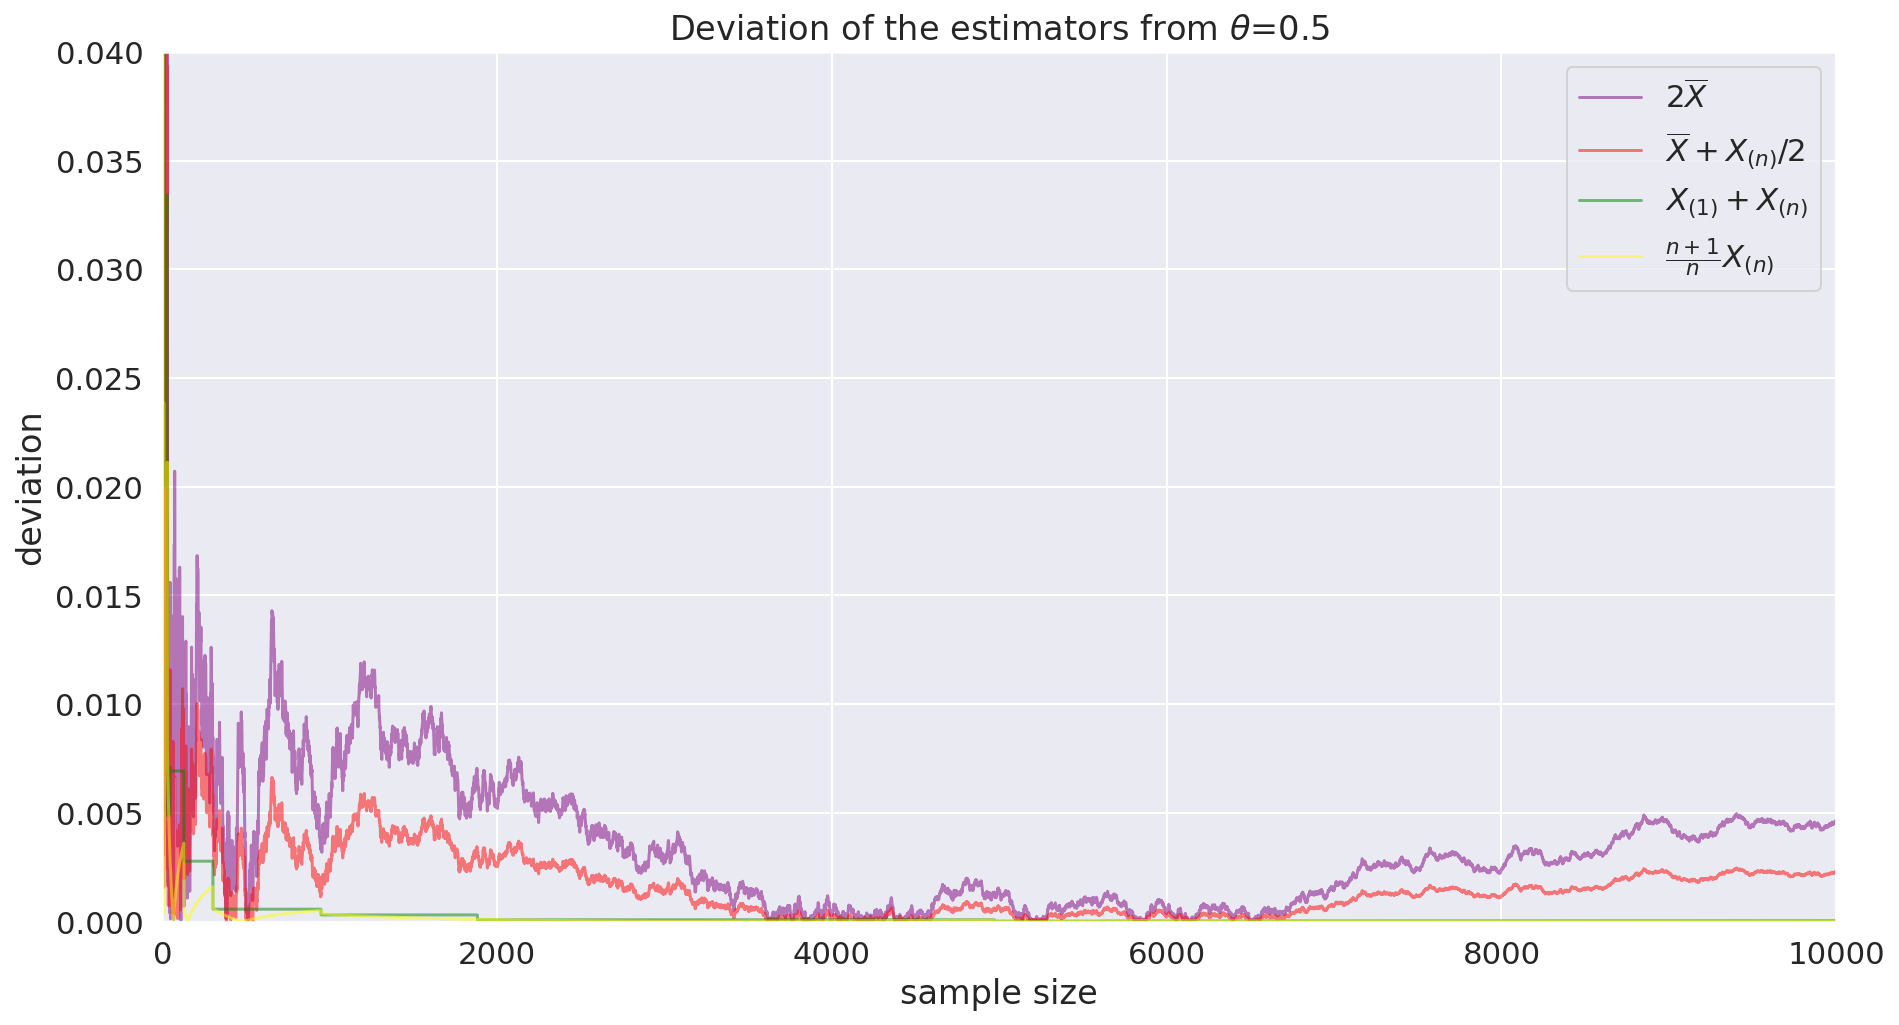

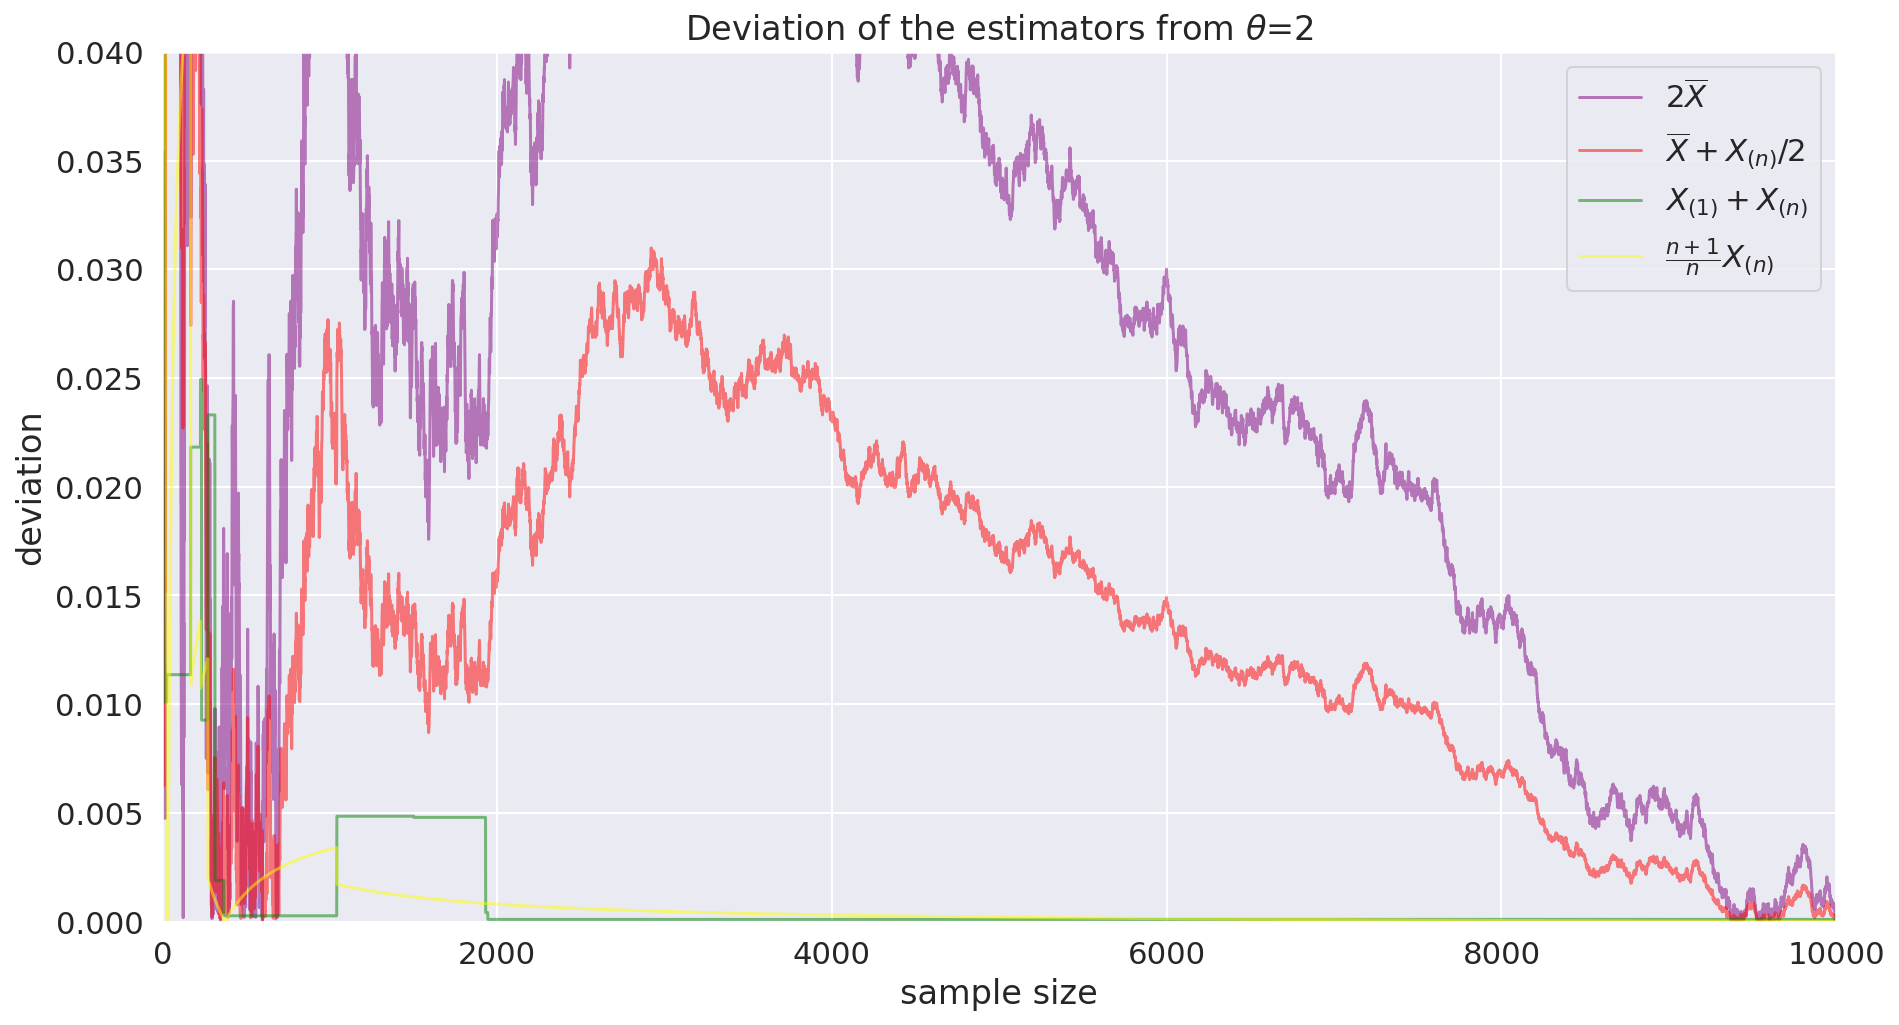

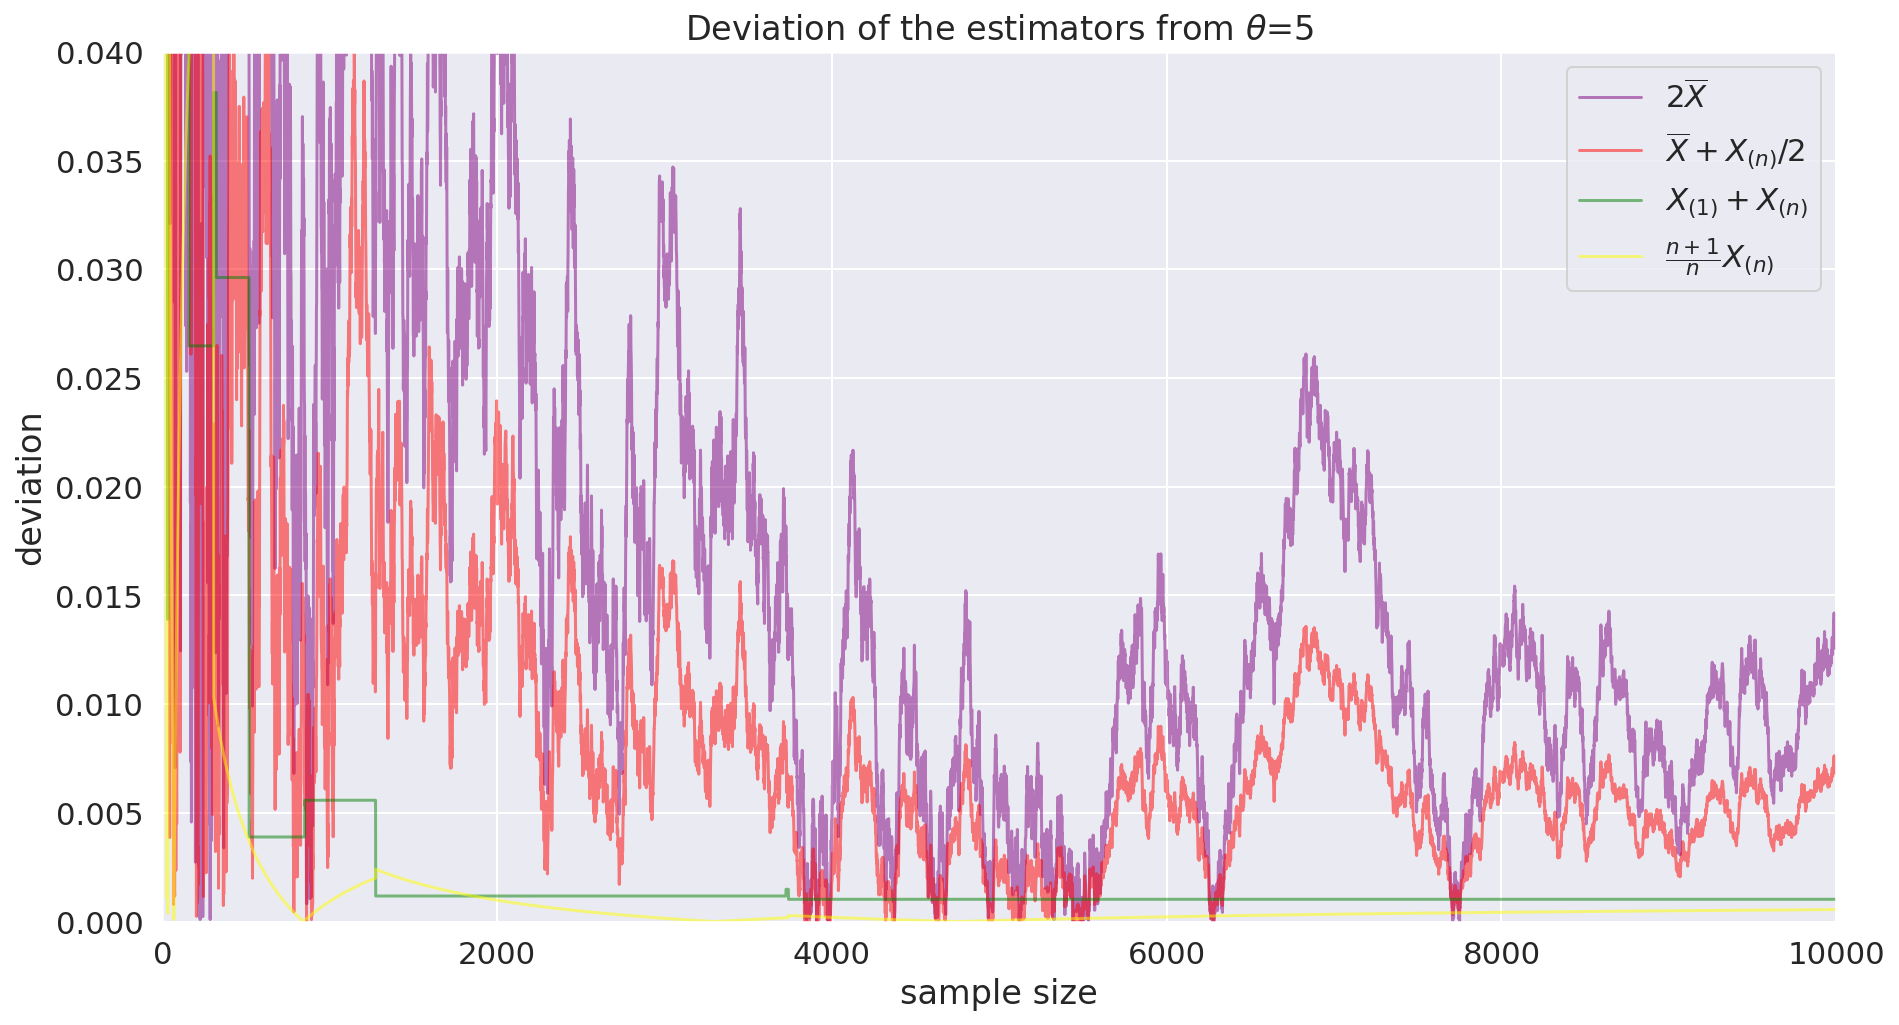

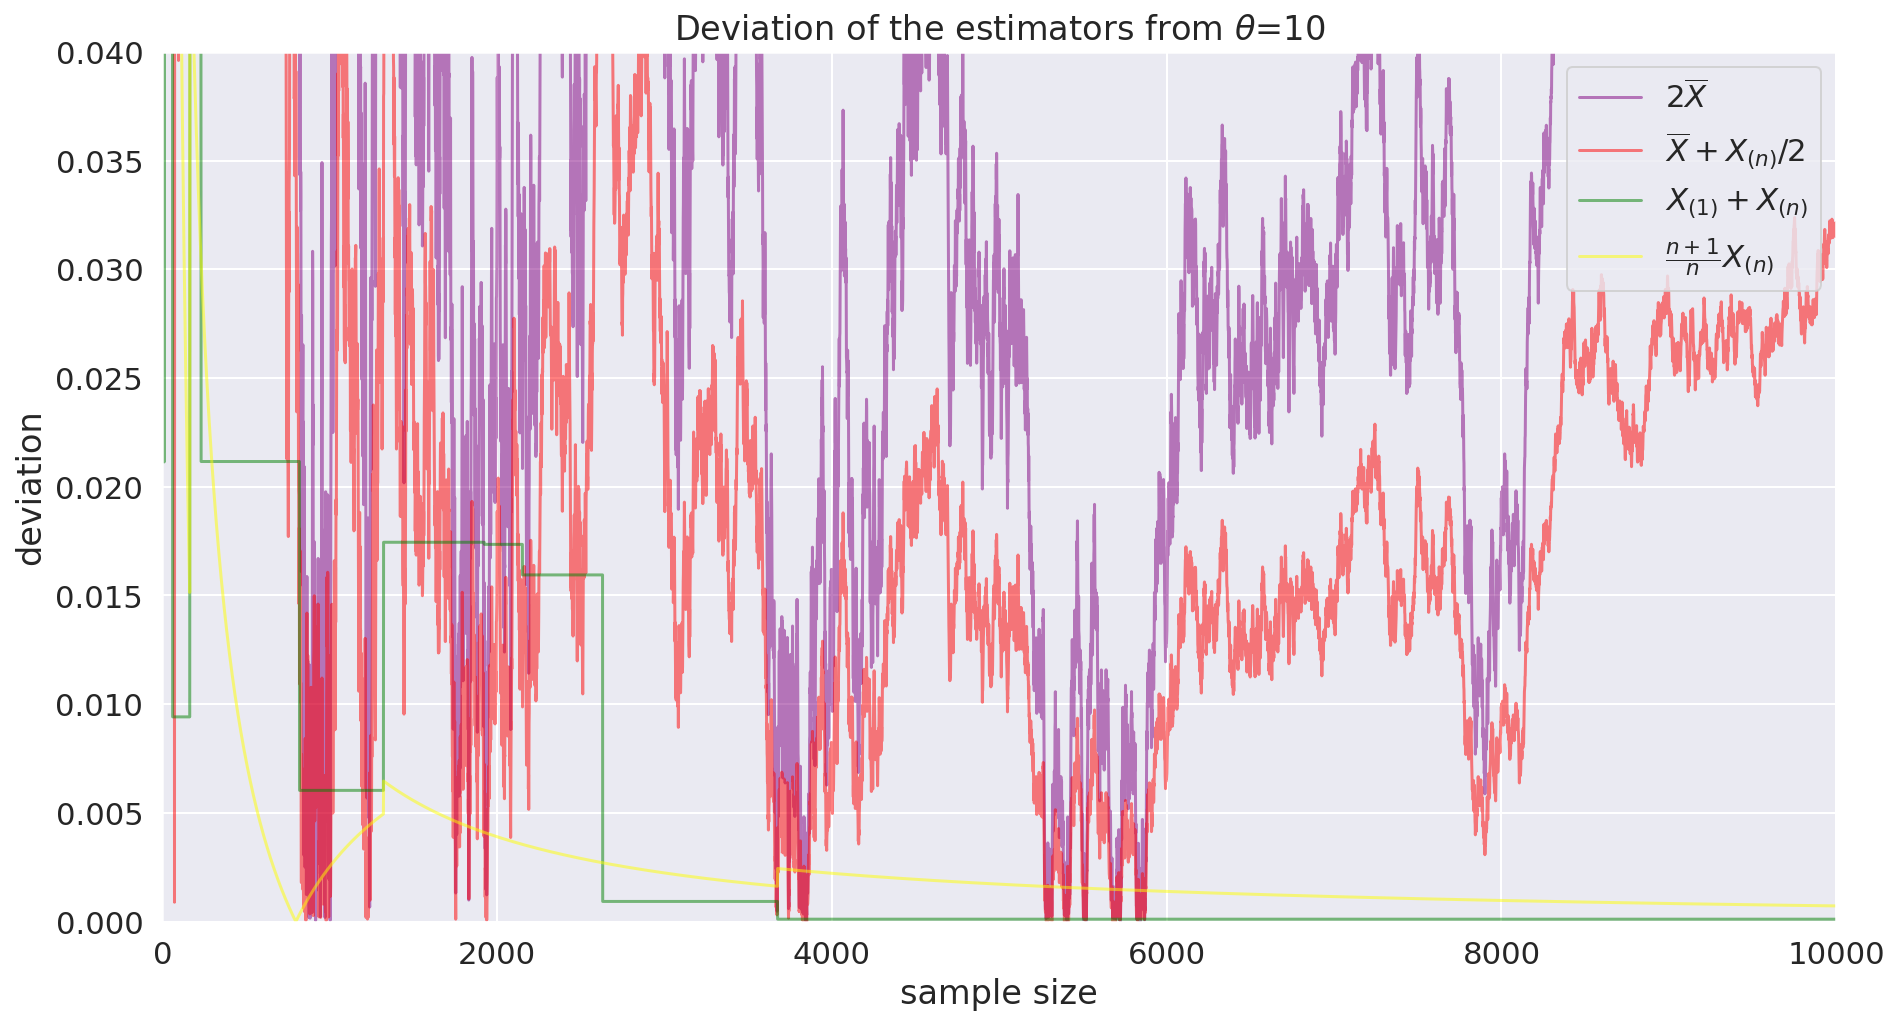

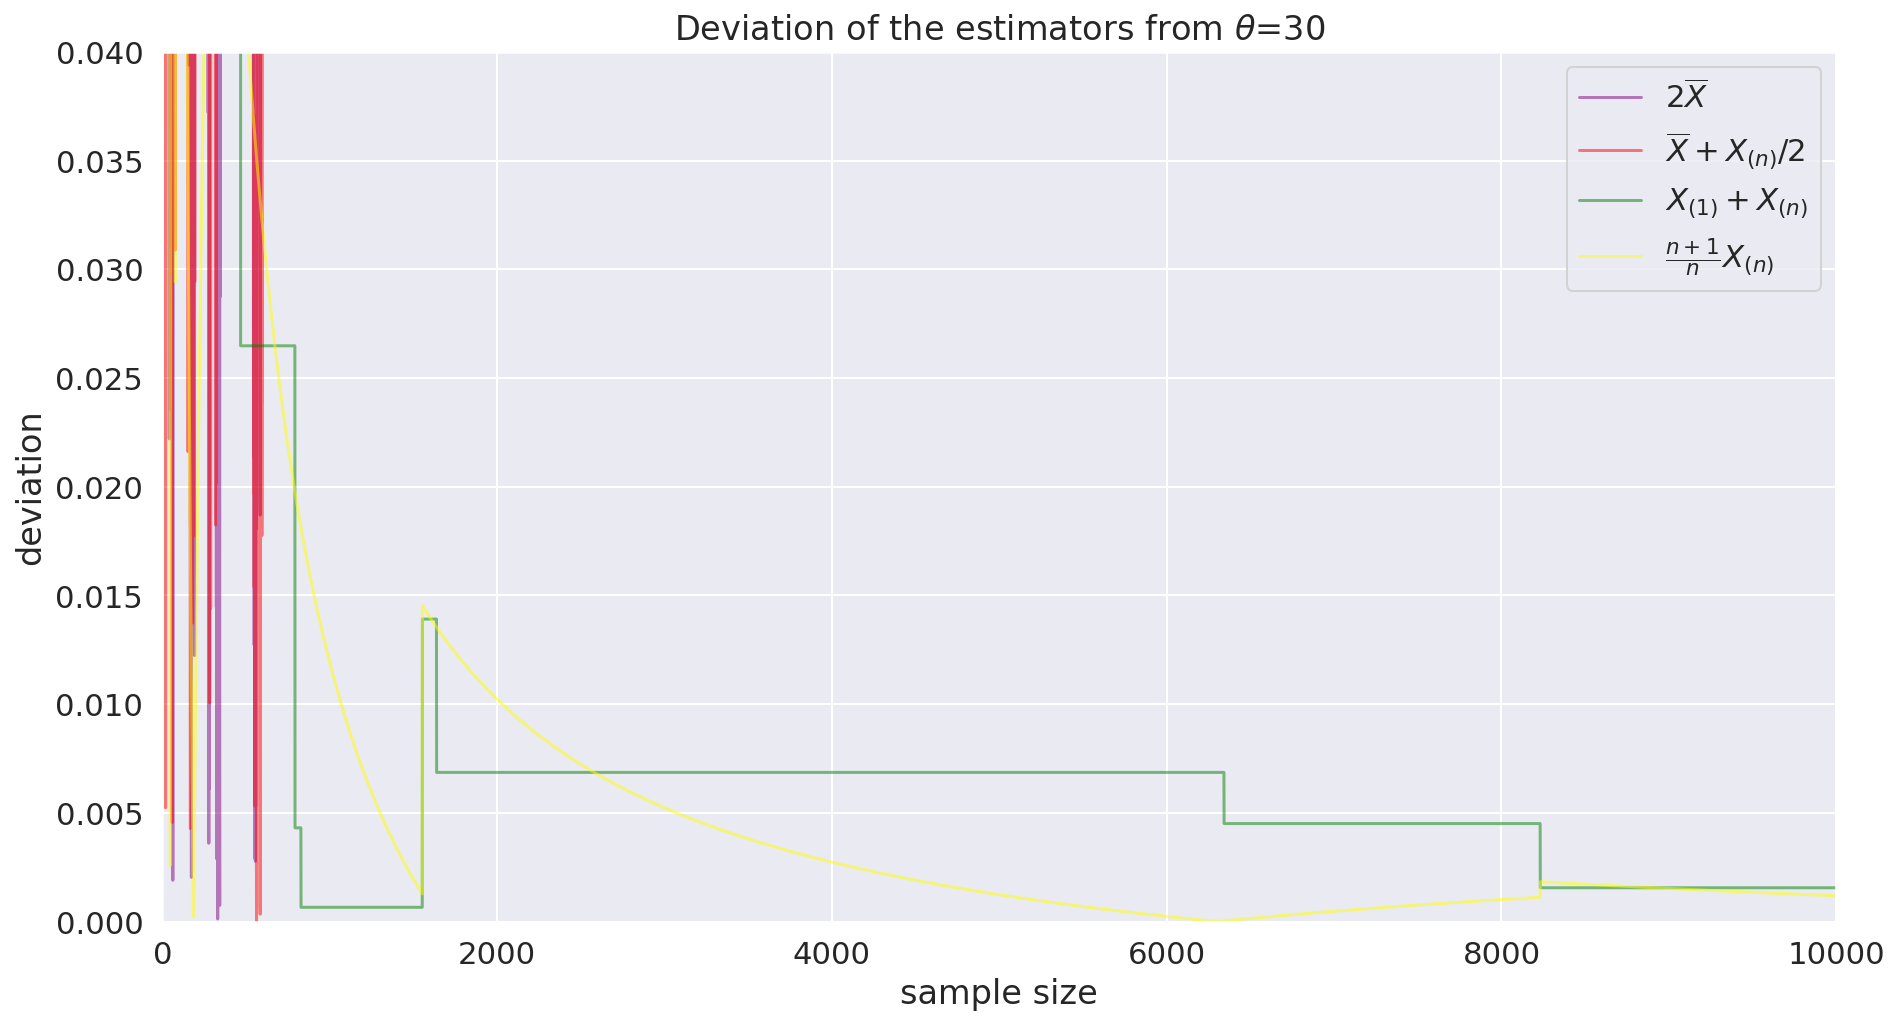

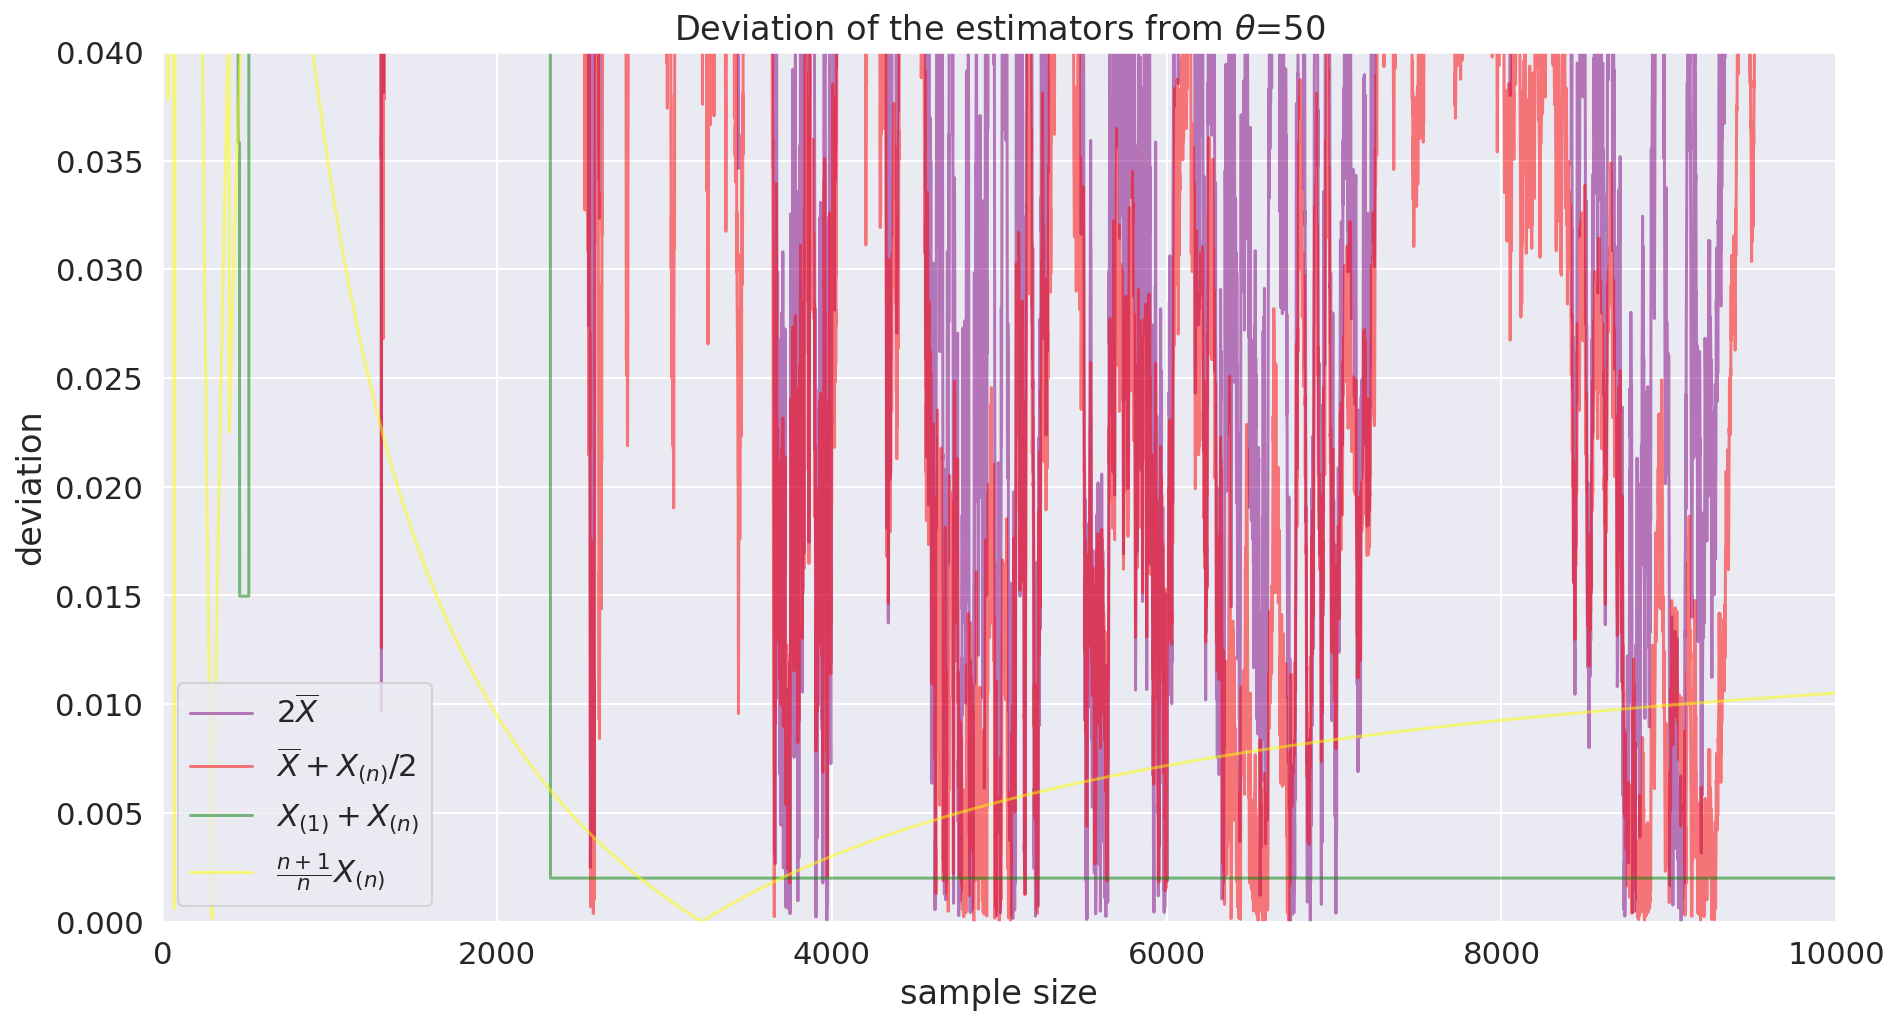

In [ ]:
theta_values = [0.5, 2, 5, 10, 30, 50]

for val in theta_values:
  samples = generate(val) #генерируем выборку

  # считаем оценки
  sample_mean = np.cumsum(samples, axis=0) / (np.arange(N)+1)
  maximum = np.maximum.accumulate(samples, axis=0)
  minimum = np.minimum.accumulate(samples, axis=0)
  # необходимые оценки
  double_sample_mean = 2 * sample_mean
  estimator2 = sample_mean + maximum / 2
  estimator3 = minimum * (np.arange(N) + 2)
  estimator4 = minimum + maximum
  estimator5 = maximum * (np.arange(N) + 2) / (np.arange(N) + 1)

  #рисуем графики
  sns.set(style="darkgrid", font_scale=1.4)

  plt.figure(figsize=(15,8))
  plt.title("Deviation of the estimators from "+r'$\theta$='+str(val))

  plt.plot(range(N), np.abs(double_sample_mean - val), alpha=0.5, color="purple", label='2$\overline{X}$')
  plt.plot(range(N), np.abs(estimator2 - val), alpha=0.5, color="red", label='$\overline{X}+X_{(n)}/ 2$')
  plt.plot(range(N), np.abs(estimator4 - val), alpha=0.5, color="green", label='$X_{(1)}+X_{(n)}$')
  plt.plot(range(N), np.abs(estimator5 - val), alpha=0.5, color="yellow", label=r'$\frac{n+1}{n}  X_{(n)}$')
  plt.xlim(0, N)
  plt.ylim(0, 0.04)
  plt.xlabel("sample size")
  plt.ylabel("deviation")
  plt.legend()
  plt.show()


Сделайте вывод.


__Вывод:__ Оценка $(n+1)X_{(1)}$ несостоятельна. Наиболее точными в смысле модуля разности с истинным значением являются оценки $\frac{n+1}{n} X_{(n)}$ и $X_{(1)}+X_{(n)}$.

### Задача 2

Придумайте распределение, у которого конечны первые два момента, а третий – нет. Сгенерируйте выборку $X_1, \dots, X_N$ из этого распределения для $N = 10^4$. 

k-й момент случайной величины - $EX^k=\int\limits_{-\infty}^{+\infty} x^k p(x)dx$, где $p(x)$ - плотность \\
Будем искать $p(x)$ вида $\frac{C}{x^m}$. Из курса мат.анализа известно, что $\int\limits_1^{+\infty} \frac{dx}{x^\alpha}$ сходится при $\alpha>1$ и расходится при $\alpha \le 1$, поэтому в кафестве плотности можно взять функцию $\frac{I(x>1)}{x^4}C$. Подберем константу: $\int\limits_1^{+\infty} \frac{Cdx}{x^4}=1 \Rightarrow C = 3$ \\
Итак,  $\,p(x)=\frac{3}{x^4}I(x>1)$.

In [ ]:
N = 10000 # размер выборки

class my_distribution(sps.rv_continuous):
    def _pdf(self, x):
        return 3 * x ** (-4)
distr = my_distribution(a=1, name='distr')

samples = distr.rvs(size=N)

Постройте график плотности, а также нанесите точки выборки на график (с нулевой y-координатой)

**Подсказка**: Может быть полезен параметр `alpha` в функции `plt.plot`

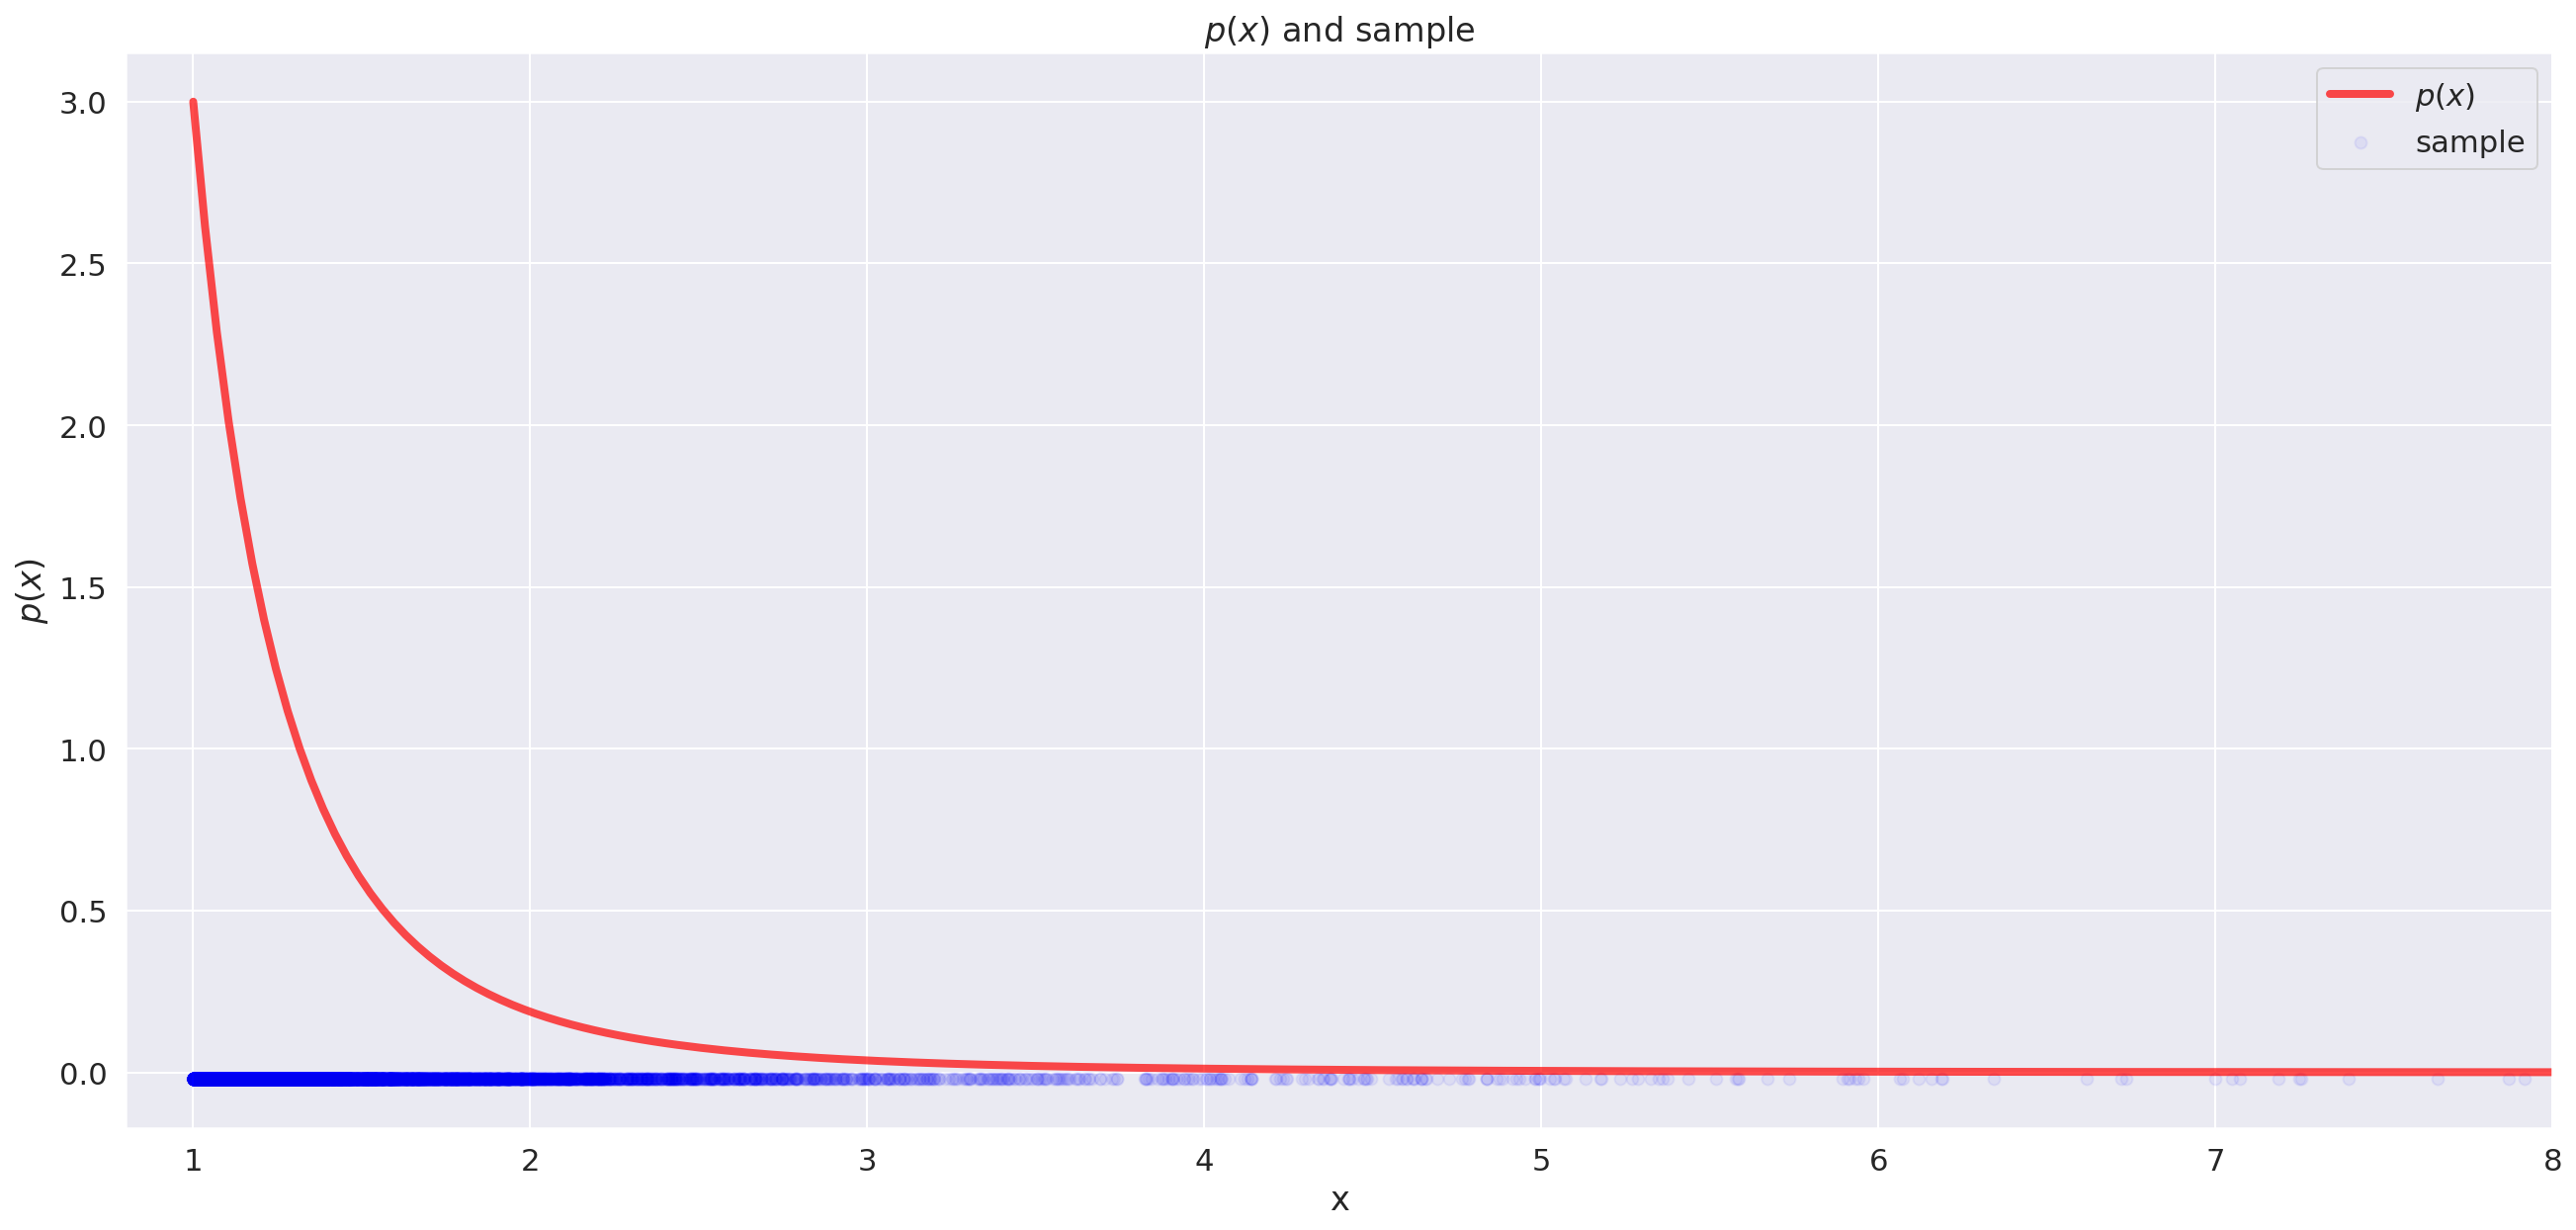

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)
grid = np.linspace(1, 36, 1000) 

plt.figure(figsize=(22,10))
plt.title("$p(x)$ and sample")

plt.plot(grid, distr.pdf(grid), lw=4, alpha=0.7, color="red", label='$p(x)$')
plt.scatter(samples, np.zeros(N)-0.02, alpha=0.06, color="blue", label="sample")
plt.xlim(0.8, 8)
plt.xlabel("x")
plt.ylabel("$p(x)$")
plt.legend()
plt.show()

Для всех $n \leq N$ посчитайте оценку $s^2 = s^2(X_1,\dots, X_N)$ для дисперсии.

Исправленная дисперсия: $s^2 = \frac{1}{n-1} \sum\limits_{i=1}^n \left(X_i - \bar{X} \right)^2 = \frac{1}{n-1} \sum\limits_{i=1}^n {X_i}^2 - \frac{1}{n(n-1)} (\sum\limits_{i=1}^n X_i)^2$

In [ ]:
def count_unbiased_sample_variance(sample):
  separator_arr = np.arange(N) # массив n-1
  separator_arr[0] = 1 #на 0 не делим
  return np.cumsum(sample**2) / separator_arr - np.cumsum(sample)**2 / separator_arr / (np.arange(N) + 1)

unbiased_sample_variance = count_unbiased_sample_variance(samples)

Постройте график зависимости модуля разности оценки дисперсии и ее истинного значения от $n$.

$DX=EX^2-(EX)^2 = \int\limits_1^{+\infty} \frac{3dx}{x^2} - (\int\limits_1^{+\infty} \frac{3dx}{x^3})^2=0.75$

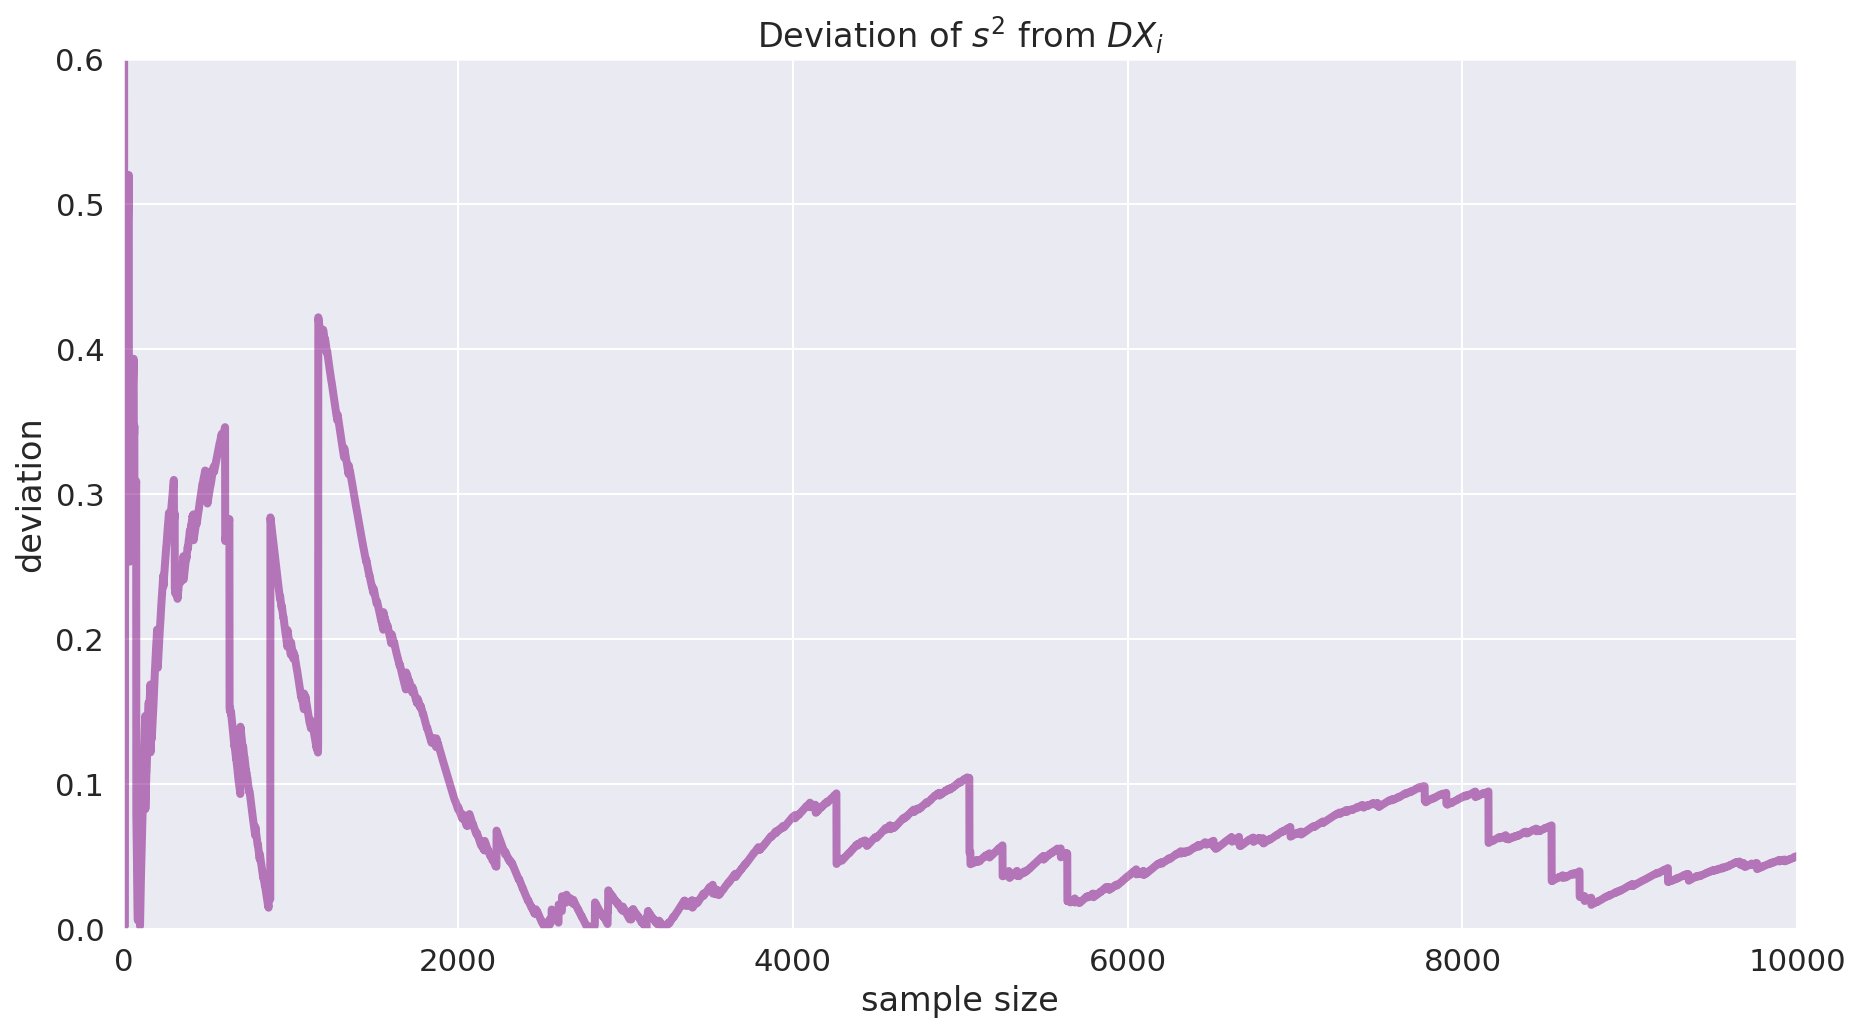

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(15,8))
plt.title("Deviation of $s^2$ from $DX_i$")

plt.plot(range(N), np.abs(unbiased_sample_variance - 0.75), lw=4, alpha=0.5, color="purple")

plt.xlim(0, N)
plt.ylim(0, 0.6)
plt.xlabel("sample size")
plt.ylabel("deviation")
plt.show()

Проведите аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) постройте график оценки дисперсии. 


In [ ]:
cauchy_sample = sps.cauchy.rvs(size=N)
unbiased_sample_variance = count_unbiased_sample_variance(cauchy_sample)

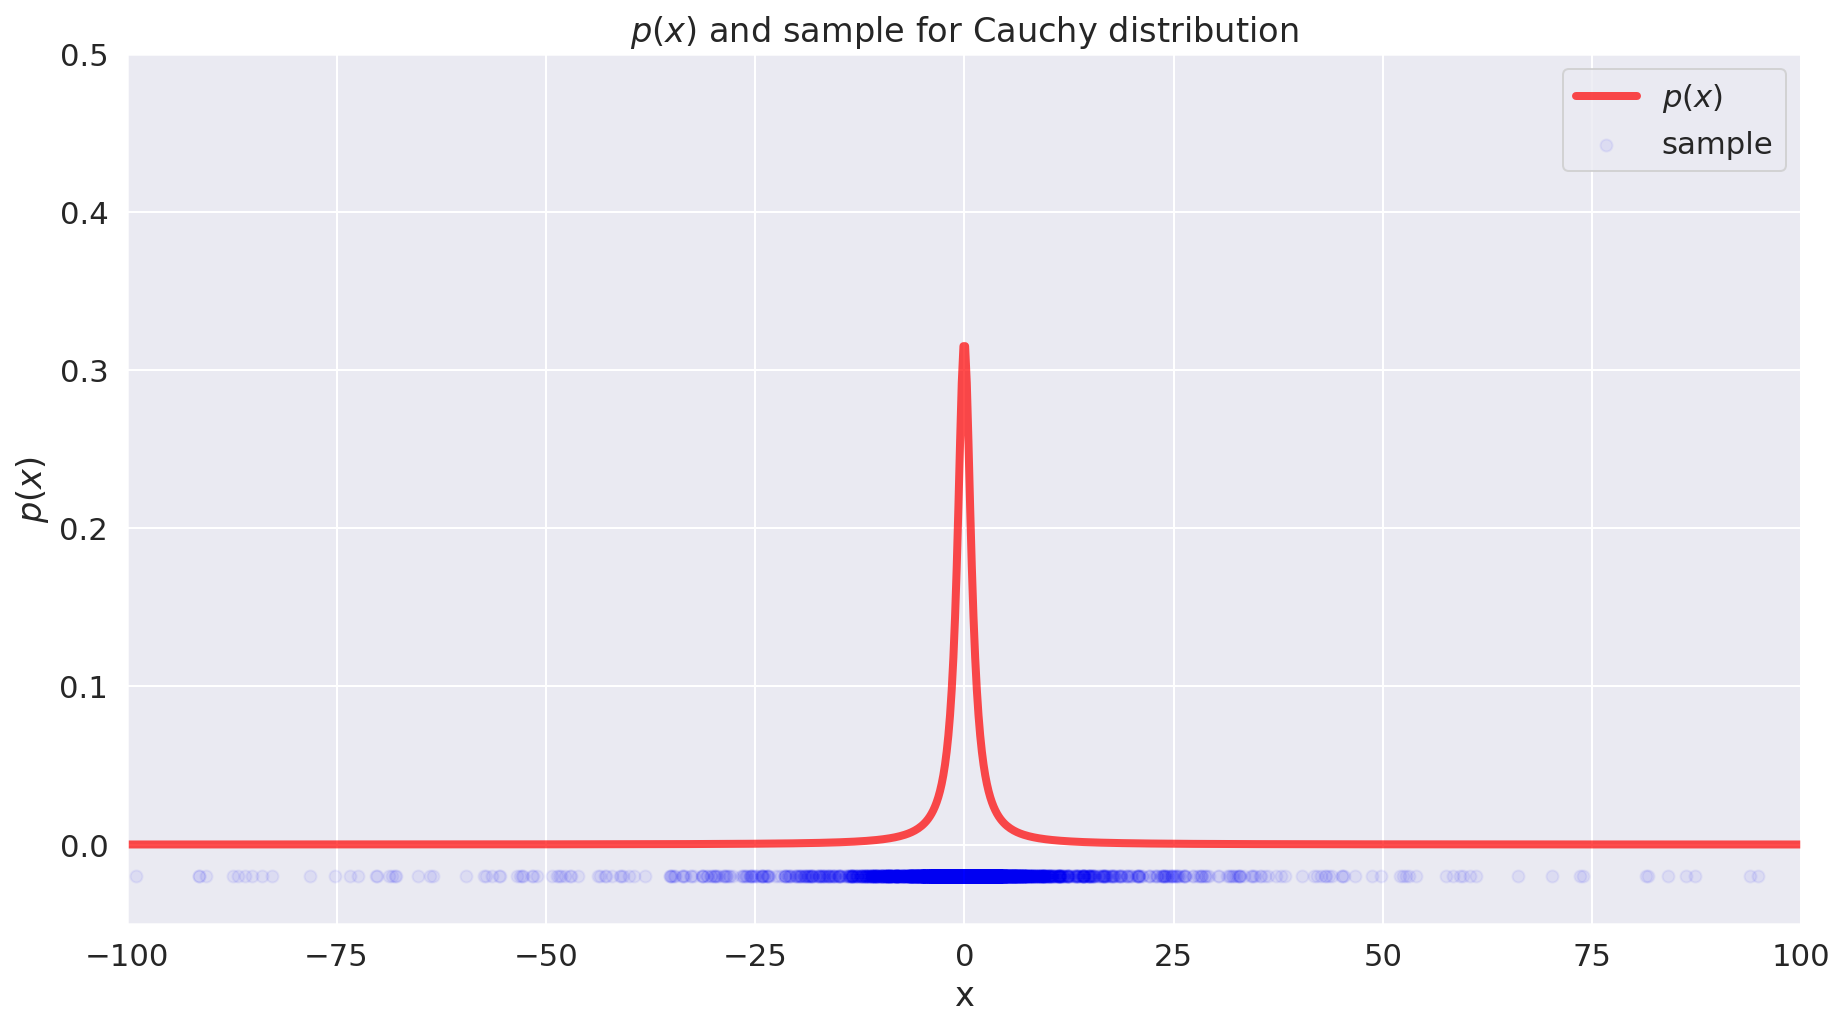

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)
grid = np.linspace(-100, 100, 1000) 

plt.figure(figsize=(15,8))
plt.title("$p(x)$ and sample for Cauchy distribution")

plt.plot(grid, sps.cauchy.pdf(grid), lw=4, alpha=0.7, color="red", label='$p(x)$')
plt.scatter(cauchy_sample, np.zeros(N)-0.02, alpha=0.06, color="blue", label="sample")
plt.xlim(-100, 100)
plt.ylim(-0.05, 0.5)
plt.xlabel("x")
plt.ylabel("$p(x)$")
plt.legend()
plt.show()

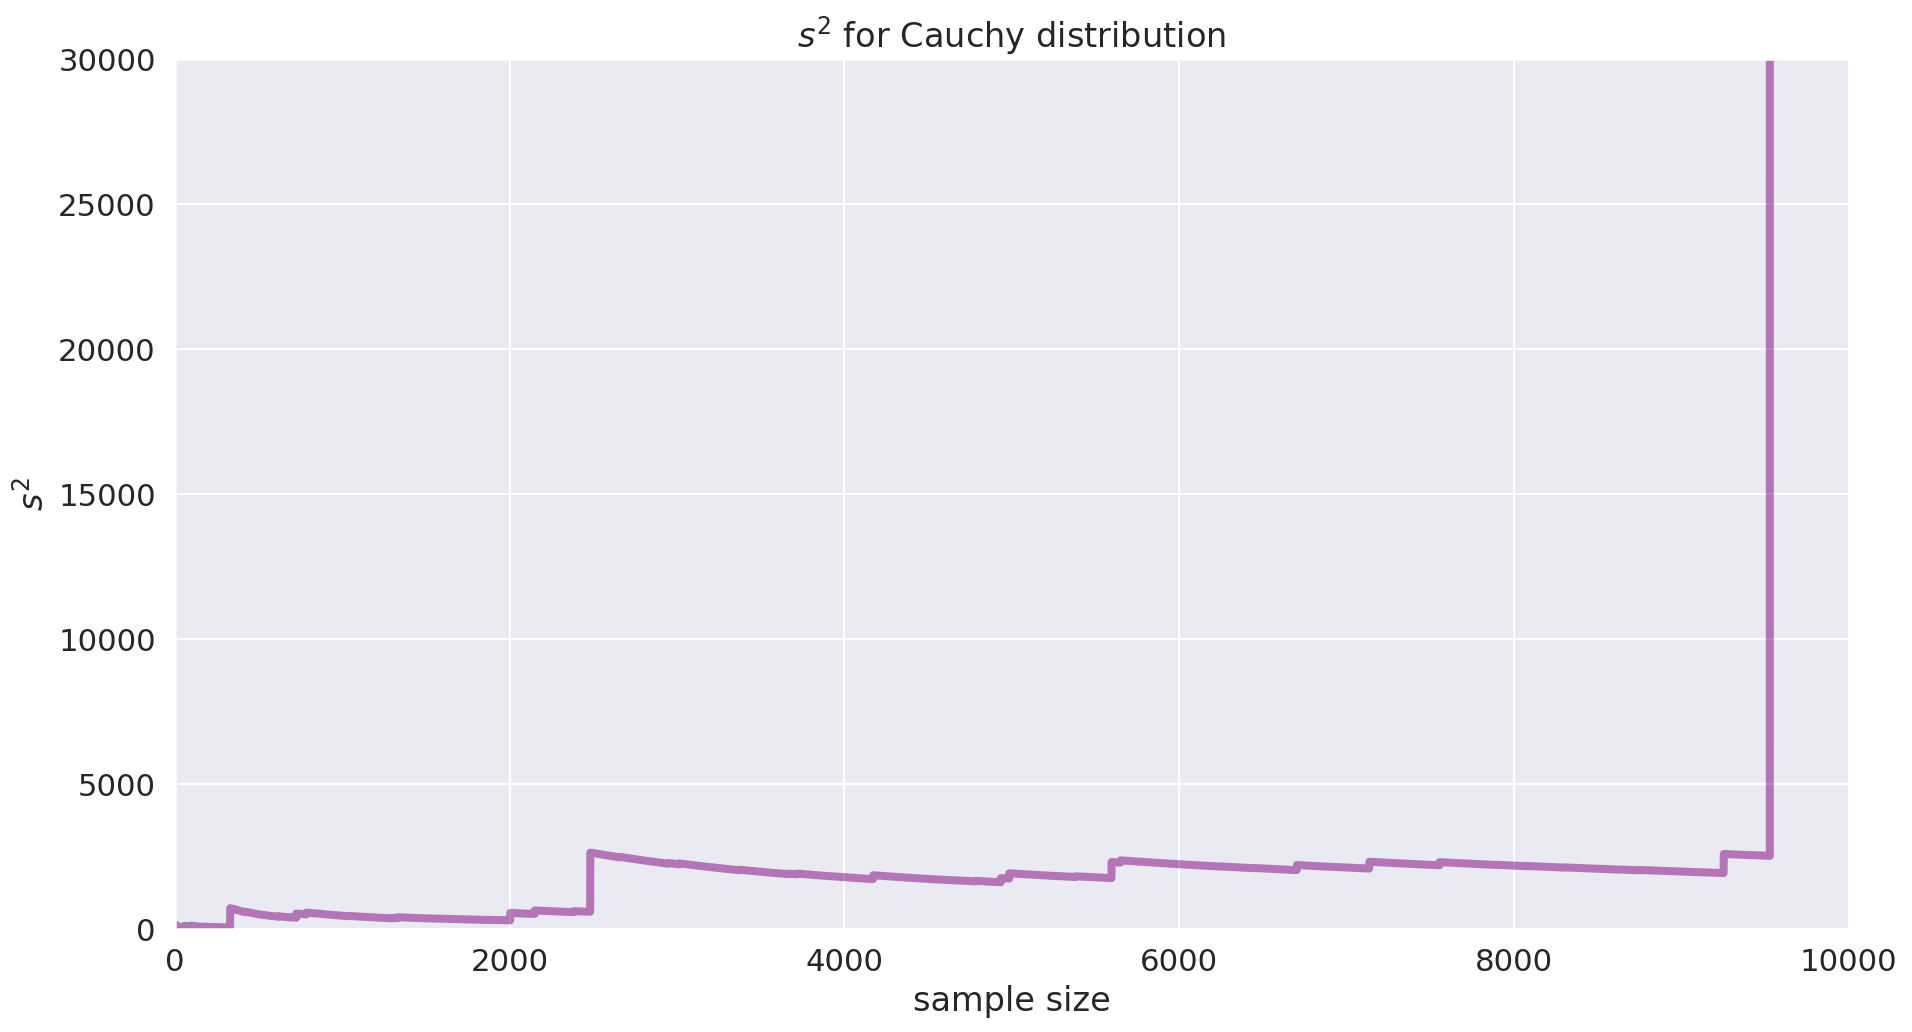

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(15,8))
plt.title("$s^2$ for Cauchy distribution")

plt.plot(range(N), unbiased_sample_variance, lw=4, alpha=0.5, color="purple")

plt.xlim(0, N)
plt.ylim(0, 30000)
plt.xlabel("sample size")
plt.ylabel("$s^2$")
plt.show()

**Вывод:** третий момент случайной величины отвечает за симметрию. У придуманного распредления он бесконечно большой и поэтому график плотности имеет длинный "хвост" справа (вся площадь под графиком сосредоточена как раз на $[1; +\infty)$). Также, мы видим, что исправленная дисперсия неплохо приближает истинное значение(в данном случае оно существует). \\
У распределения Коши дисперсия $+\infty$, и (из графика) исправленная дисперсия имеет большой разброс. 

### Задача 3

Сгенерируйте выборку $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [ ]:
N = 10000
samples = sps.norm().rvs(N)

Для всех $n \leqslant N$ посчитайте по ней эмпирическую функцию распределения.


In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary

ecdf = np.array([ECDF(samples[:n]) for n in range(1, N+1)])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

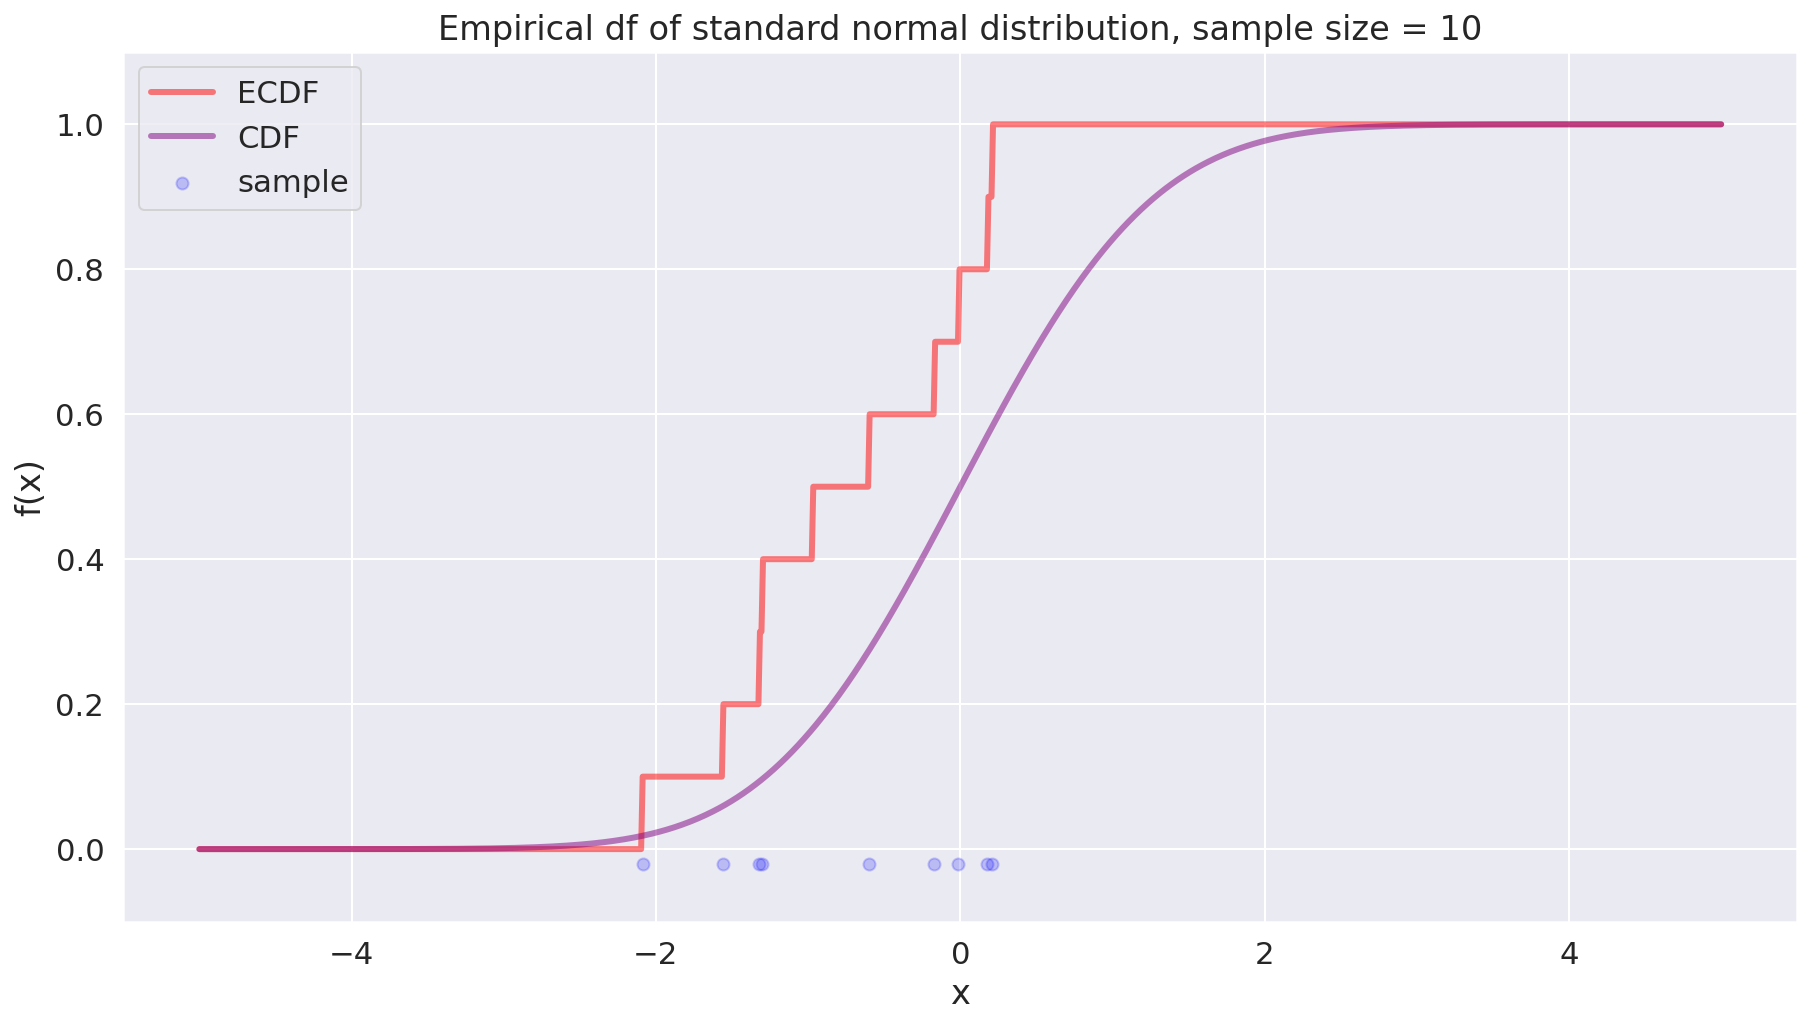

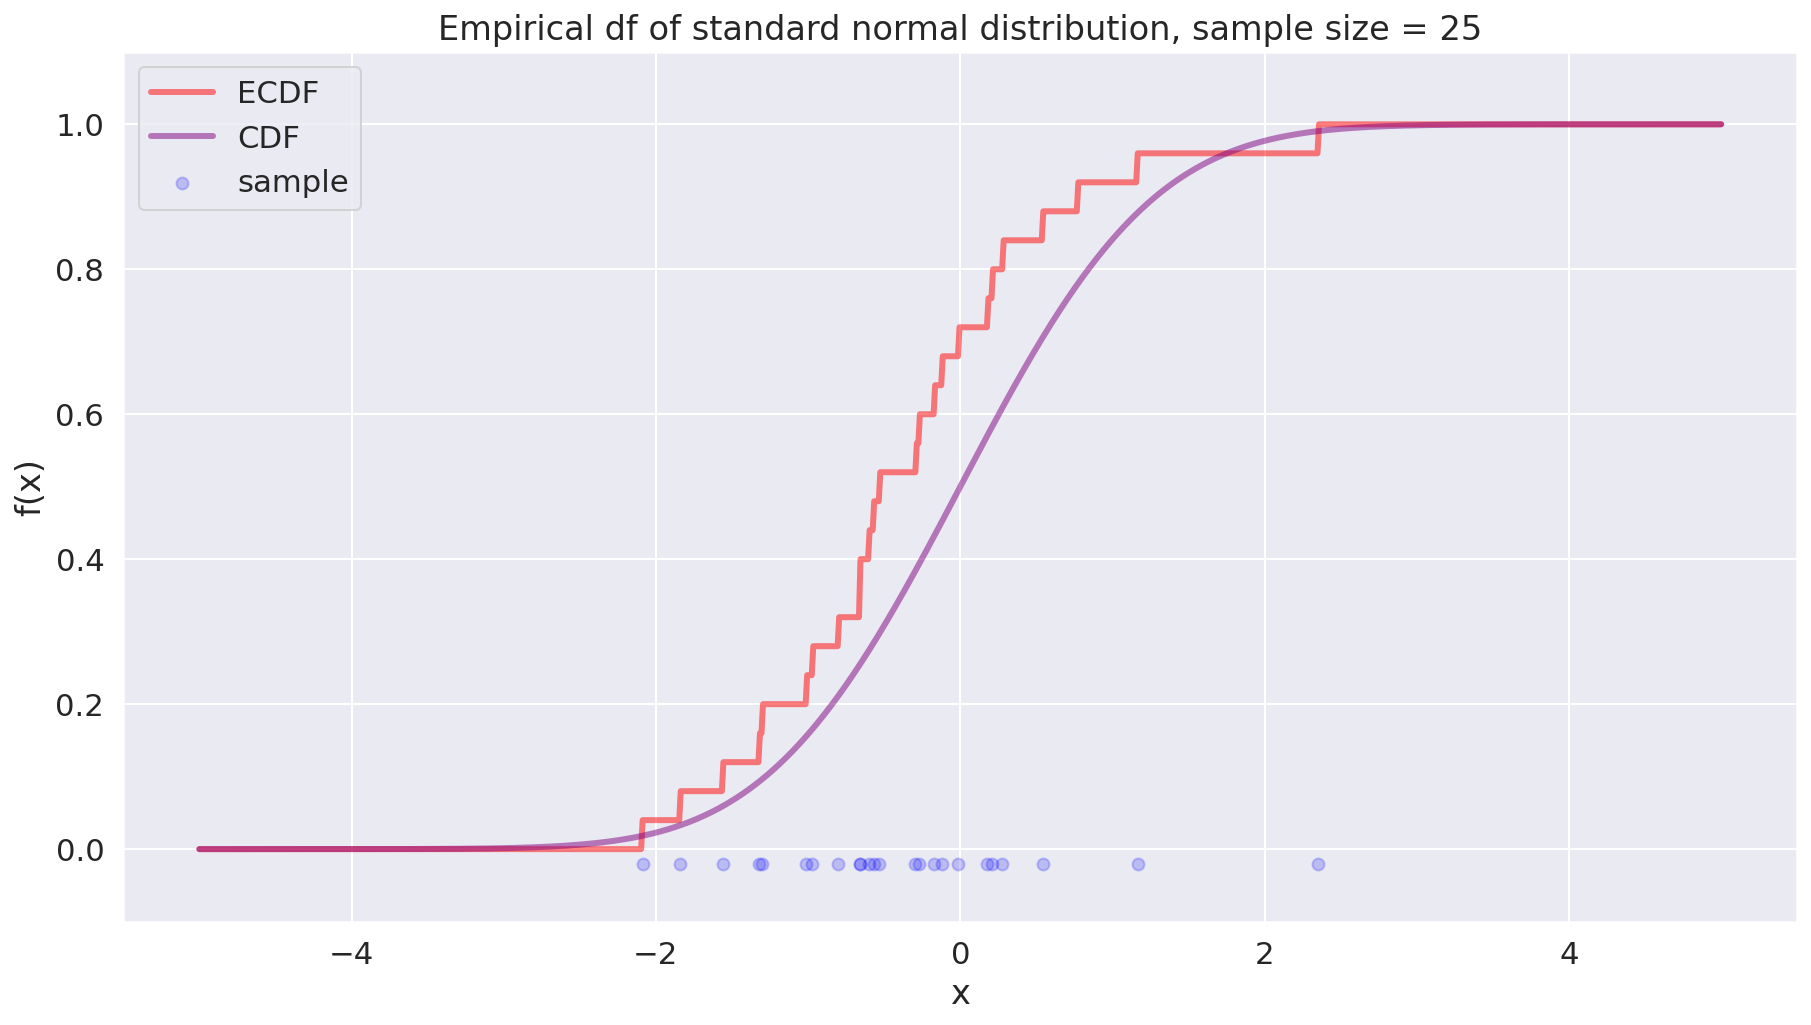

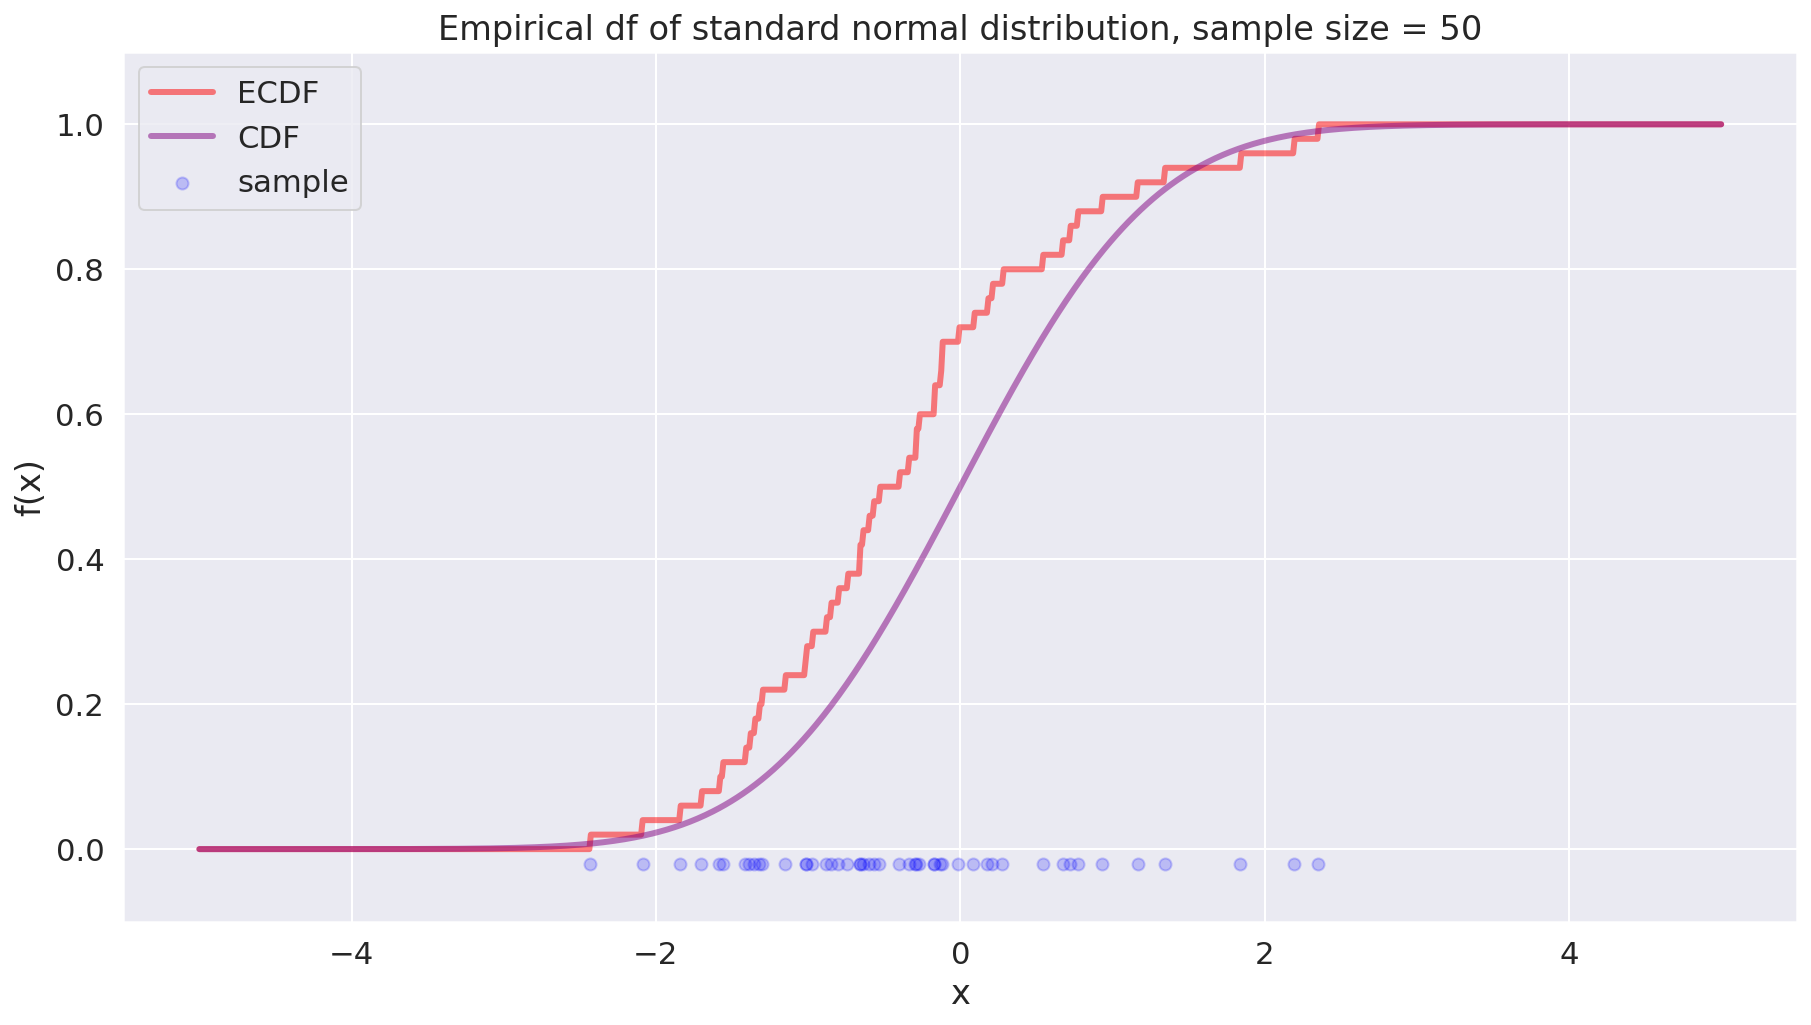

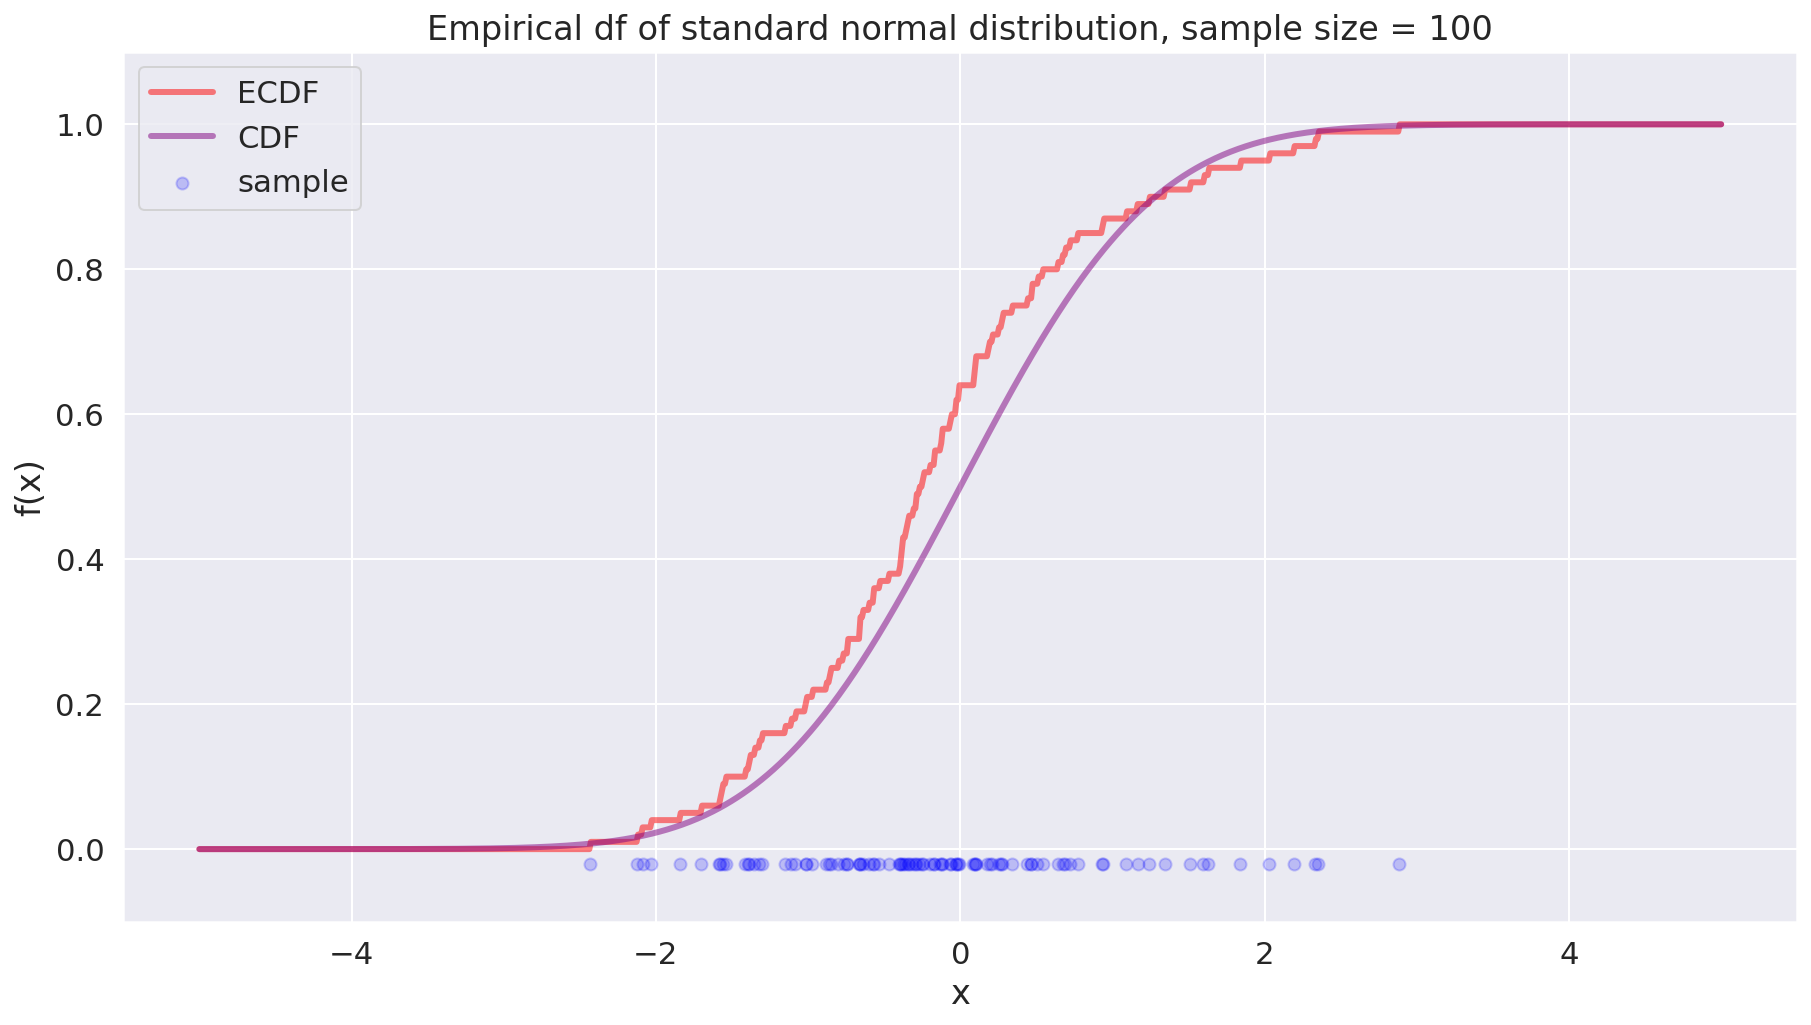

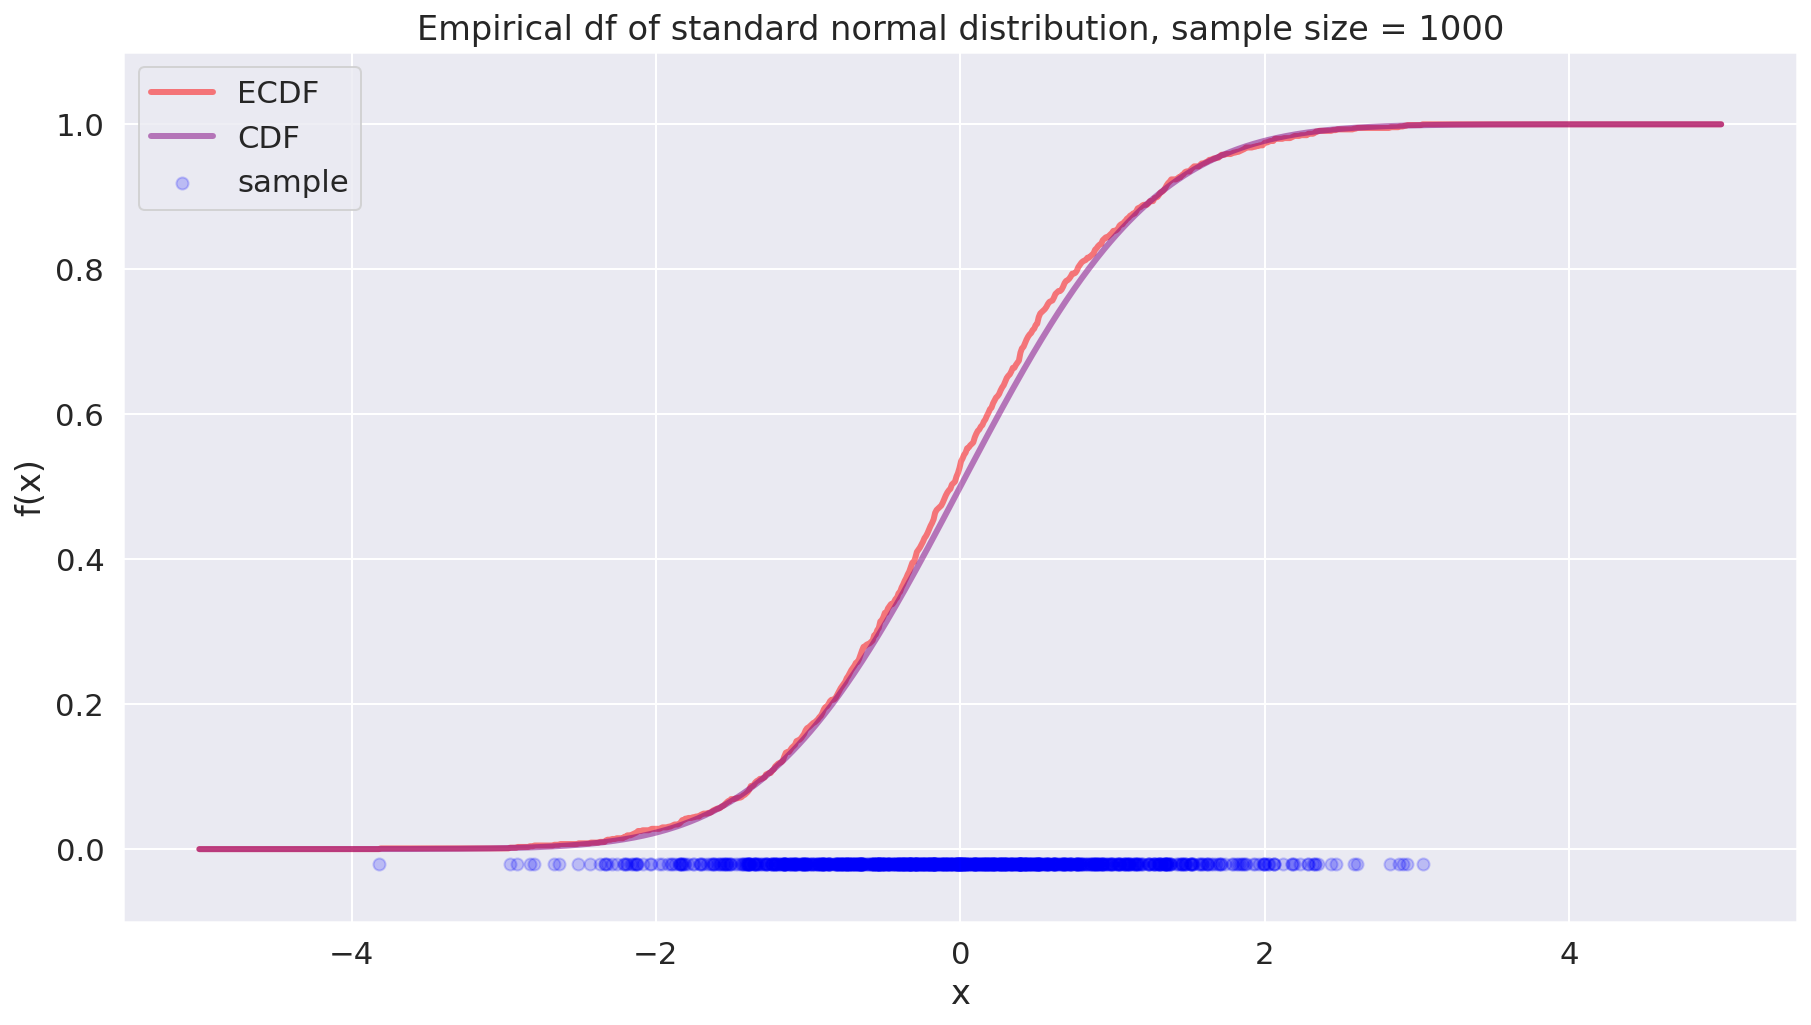

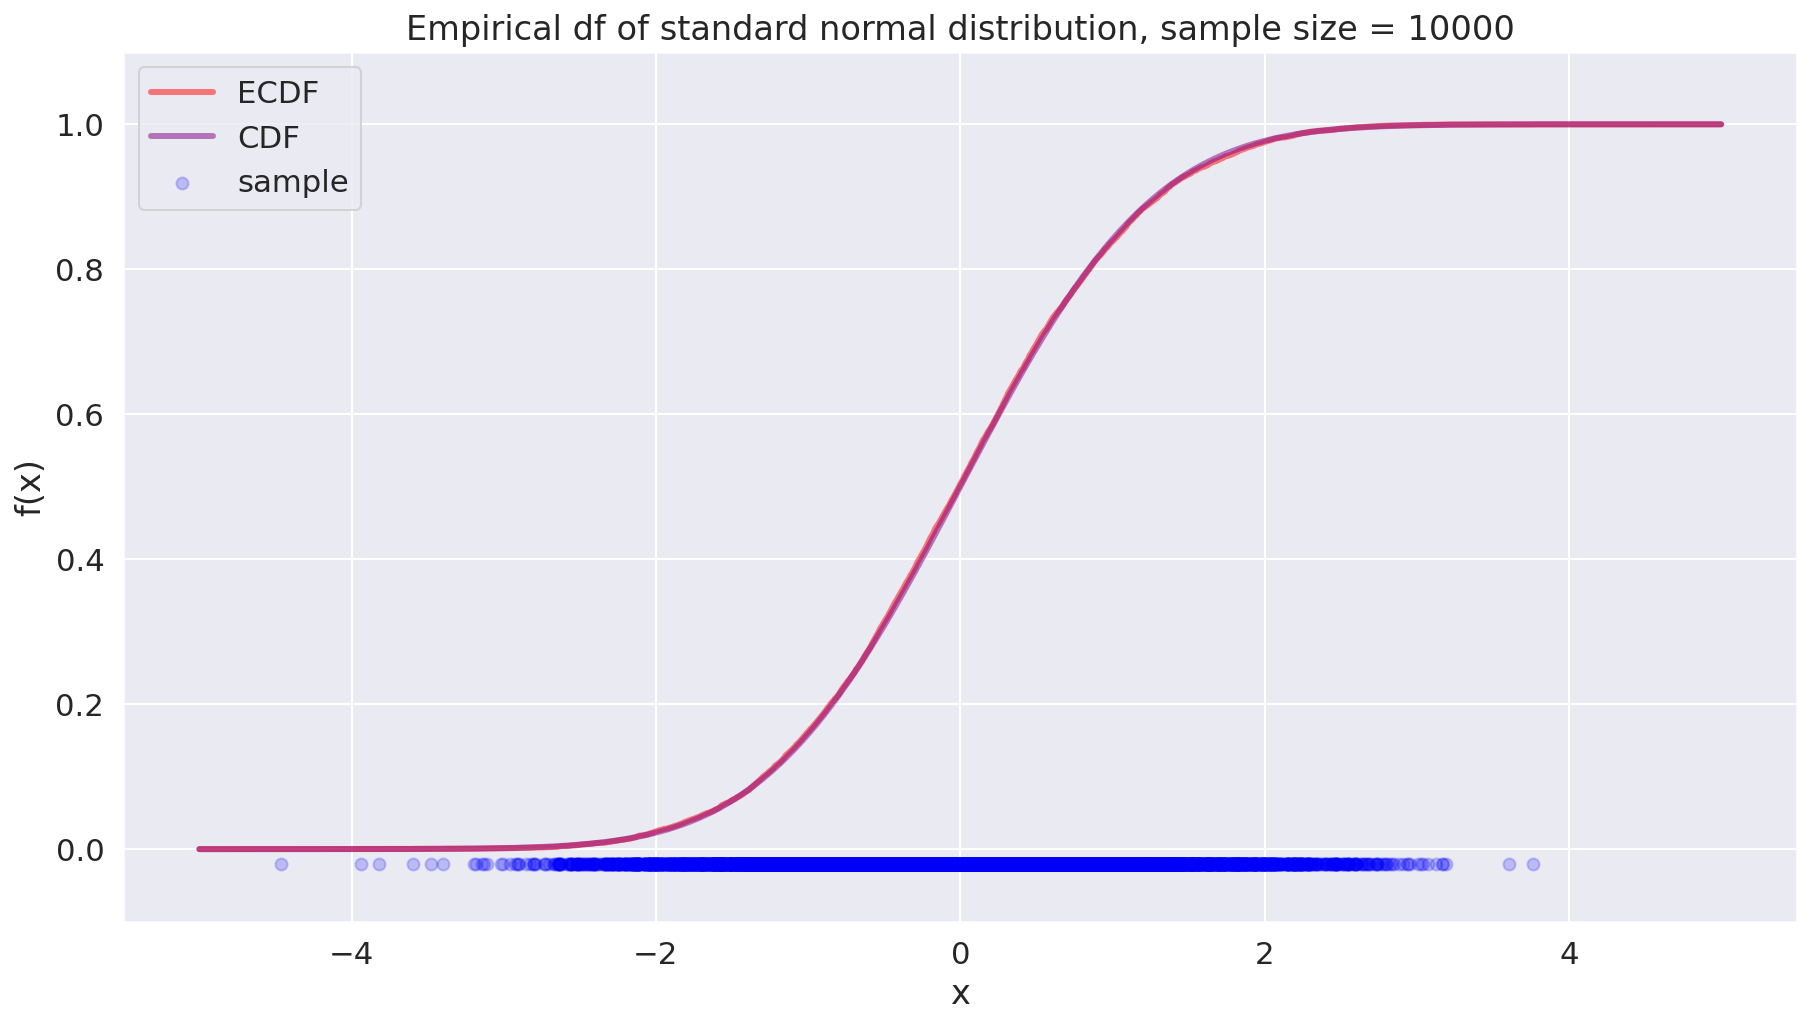

In [ ]:
n = [10, 25, 50, 100, 1000, N]

for i in n:
  sns.set(style="darkgrid", font_scale=1.4)

  plt.figure(figsize=(15,8))
  plt.title("Empirical df of standard normal distribution, sample size = "+str(i))

  grid = np.linspace(-5, 5, 1000)
  plt.plot(grid, ecdf[i-1](grid), lw=3, alpha=0.5, color="red", label='ECDF')
  plt.plot(grid, sps.norm().cdf(grid), lw=3, alpha=0.5, color='purple', label='CDF')
  plt.scatter(samples[:i-1], np.zeros(i-1)-0.02, alpha=0.2, color="blue", label="sample")

  plt.ylim(-0.1, 1.1)
  plt.xlabel("x")
  plt.ylabel("f(x)")
  plt.legend()
  plt.show()


Для всех $n ≤ N$ посчитайте точное значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ и постройте график зависимости статистик $D_n$ и $\sqrt{n}D_n$ от $n$. 


Так как эмпирическая функция ступенчатая, то достаточно посмотреть разность в точках выборки, но в каждой точке нужно брать два значения: само значение эмп.ф-ции в точке и значение на предыдущей ступеньке (каждая ступенька имеет некоторое значение на интервале вида [a,b),т.е. в правой границе функция принимает уже другое значение). 

In [ ]:
Dn = []
for n in range(N):
  delta_left = np.max(np.abs(ecdf[n].y-sps.norm.cdf(ecdf[n].x))) 
  delta_right = np.max(np.abs(ecdf[n].y[:-1]-sps.norm.cdf(ecdf[n].x[1:])))
  Dn.append(max(delta_left, delta_right))

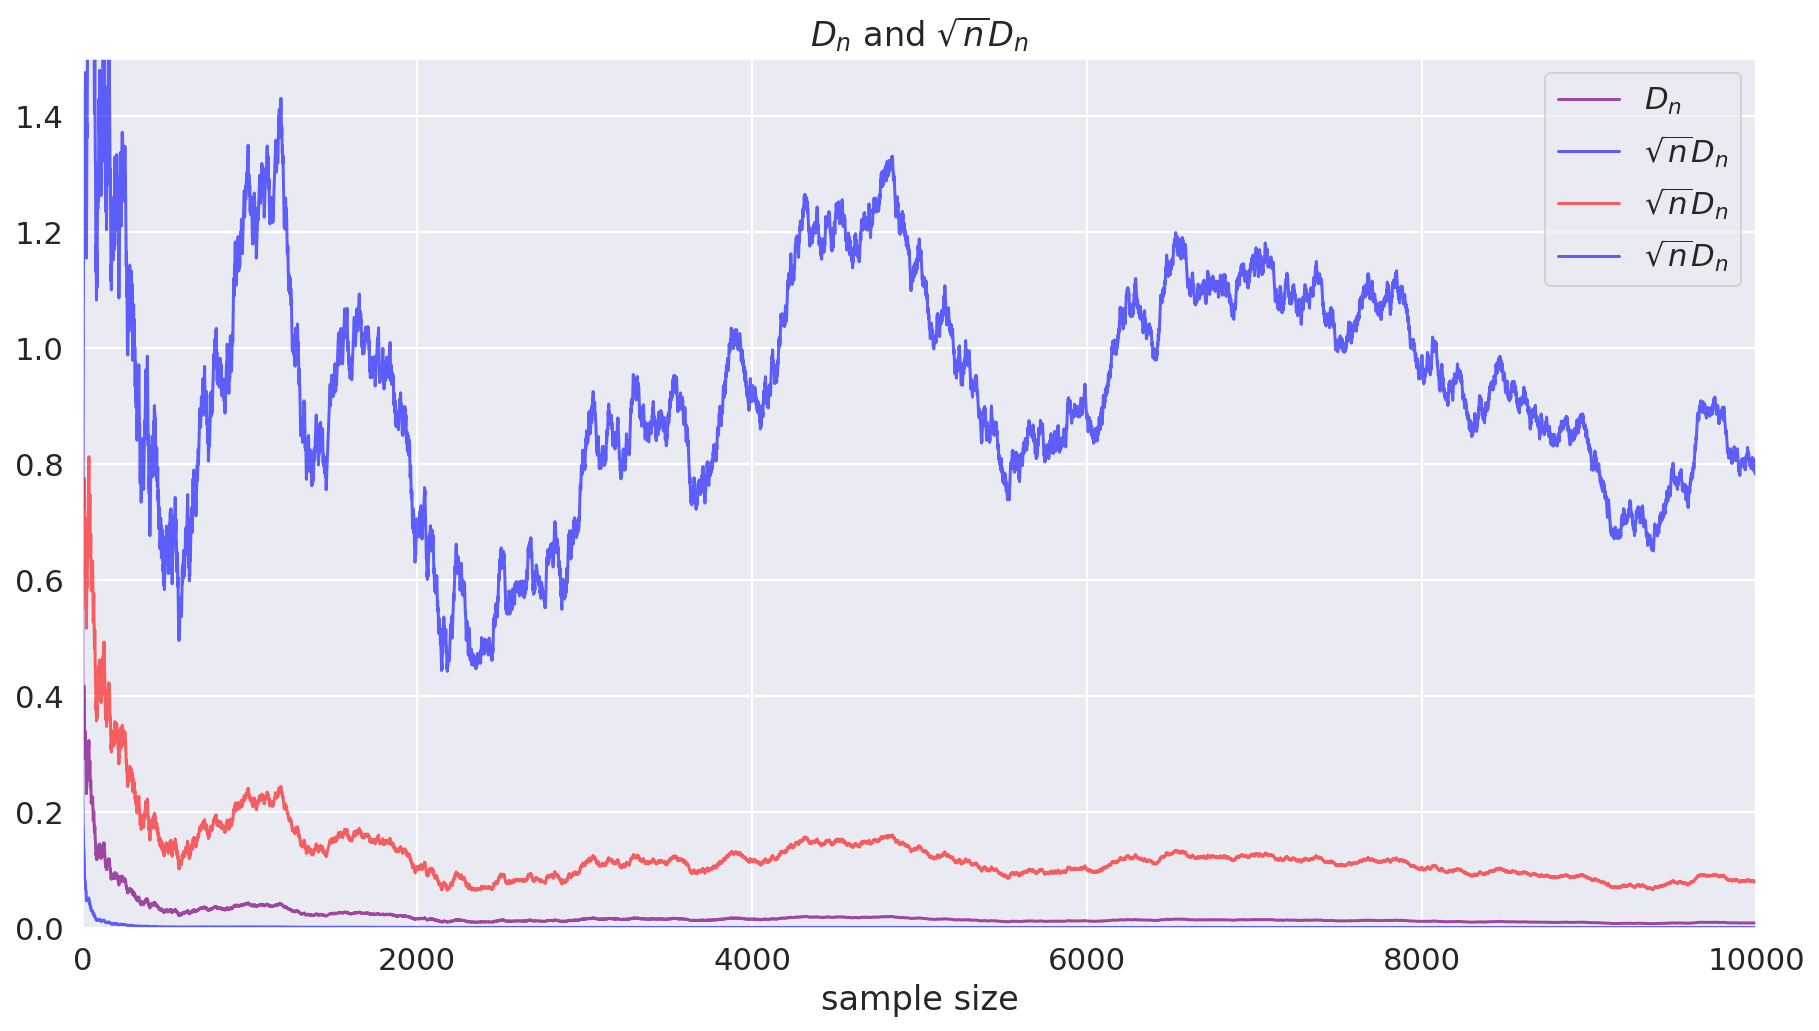

In [ ]:
sns.set(style="darkgrid", font_scale=1.4)

plt.figure(figsize=(15,8))
plt.title("$D_n$ and $\sqrt{n} D_n$")

plt.plot(range(N), Dn, alpha=0.7, color="purple", label='$D_n$')
plt.plot(range(N), np.array(Dn)*(np.arange(N)+1)**0.5, alpha=0.6, color="blue", label='$\sqrt{n} D_n$')
plt.plot(range(N), np.array(Dn)*(np.arange(N)+1)**(0.25), alpha=0.6, color="red", label='$\sqrt{n} D_n$')
plt.plot(range(N), np.array(Dn)*(np.arange(N)+1)**(-0.5), alpha=0.6, color="blue", label='$\sqrt{n} D_n$')

plt.xlim(0, N)
plt.ylim(0, 1.5)
plt.xlabel("sample size")
plt.legend()
plt.show()

**Вывод:** $\displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ стремится к 0 с ростом n (о чем, кстати, говорит теорема Гливенко-Кантелли). Это можно было заметить еще на первой серии графиков: при больших n графики эмпирической и истинной функциий распределения практически совпали. \\
Из графика $\sqrt{n} D_n$ можно сделать вывод о скорости сходимости эмпирической функции к истинной, т.к. эта статистика уже не сходится к 0.

### Задача 4

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Для каждой выборки посчитайте статистики $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [ ]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

samples = sps.uniform().rvs((N_samples, N))


double_sample_mean = 2*np.mean(samples, axis=1)
unbiased_max = (N+1)/N * np.amax(samples, axis=1)

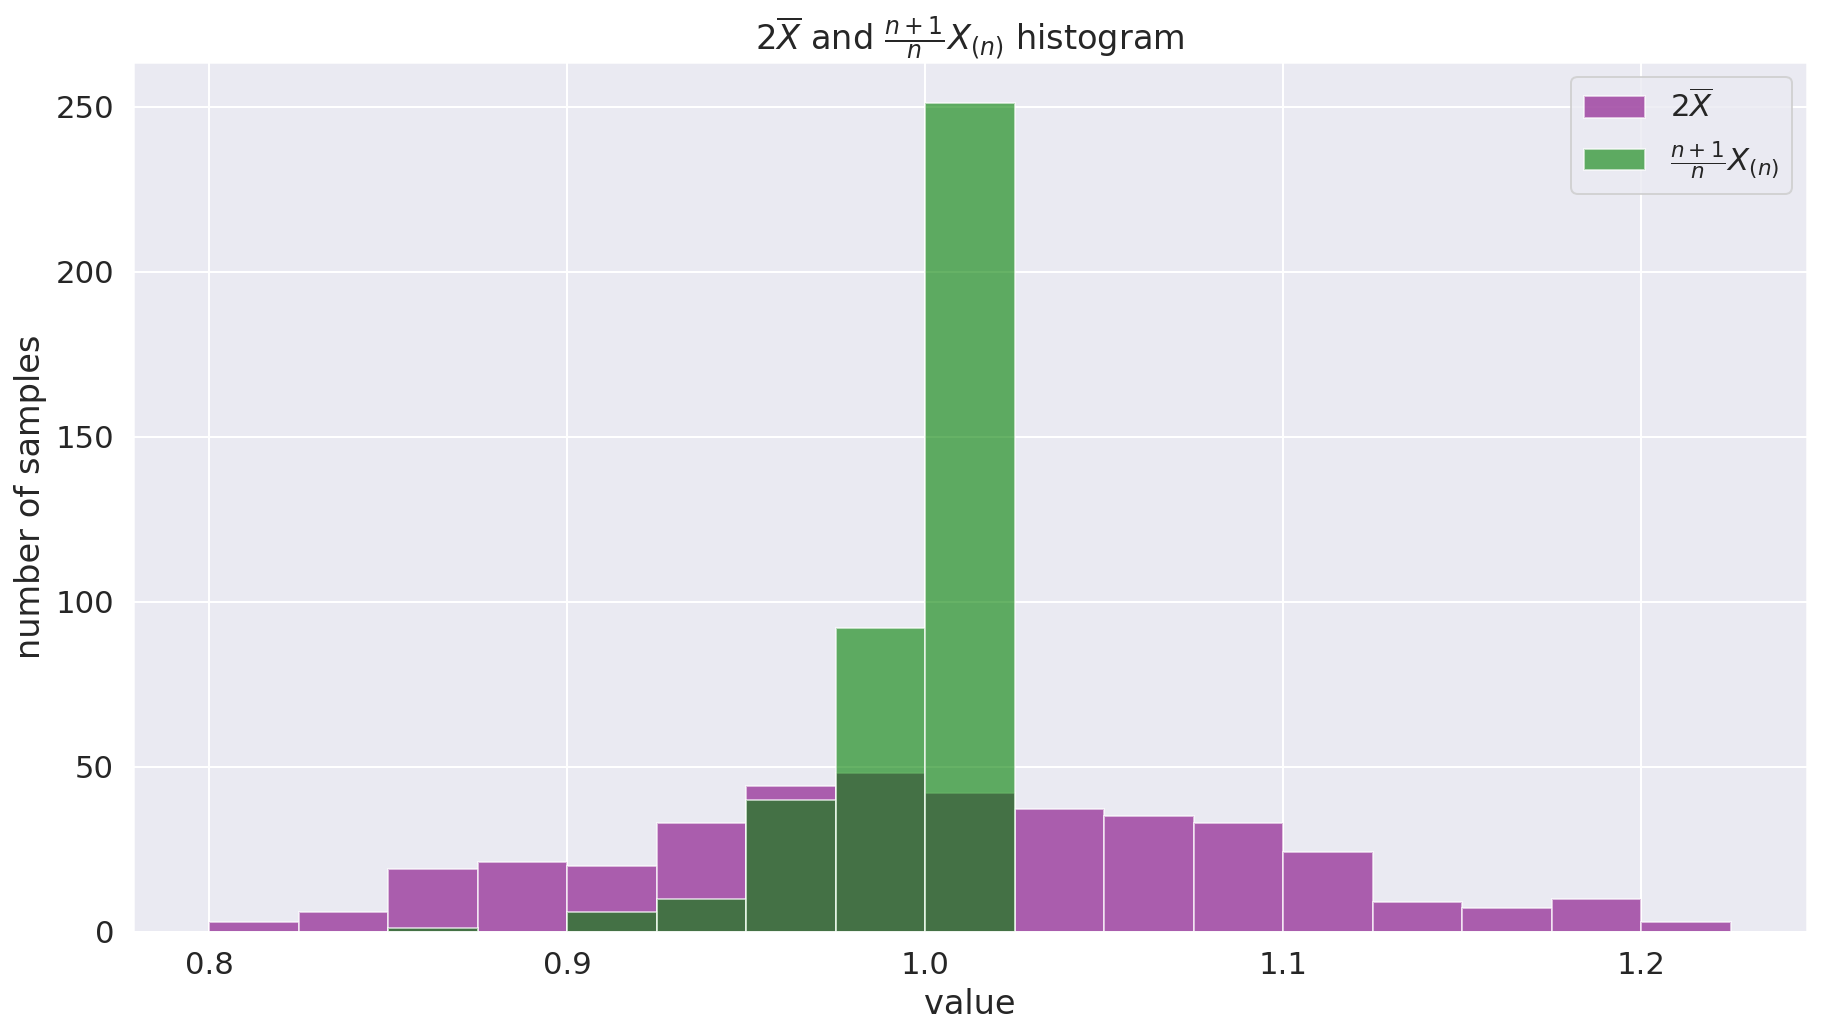

In [ ]:
plt.figure(figsize=(15, 8))
plt.title("$2\overline{X}$ and "+r"$\frac{n+1}{n}  X_{(n)}$"+" histogram")
plt.hist(double_sample_mean, alpha=0.6, color="purple", bins=bins, label='$2\overline{X}$')
plt.hist(unbiased_max, alpha=0.6, color="green", bins=bins, label=r'$\frac{n+1}{n}  X_{(n)}$')
plt.legend()
plt.xlabel("value")
plt.ylabel("number of samples")
plt.show()

Постройте гистограммы для статистик $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$

In [ ]:
stat1 = N**0.5 * (double_sample_mean - 1)
stat2 = 1 - N*(unbiased_max - 1)

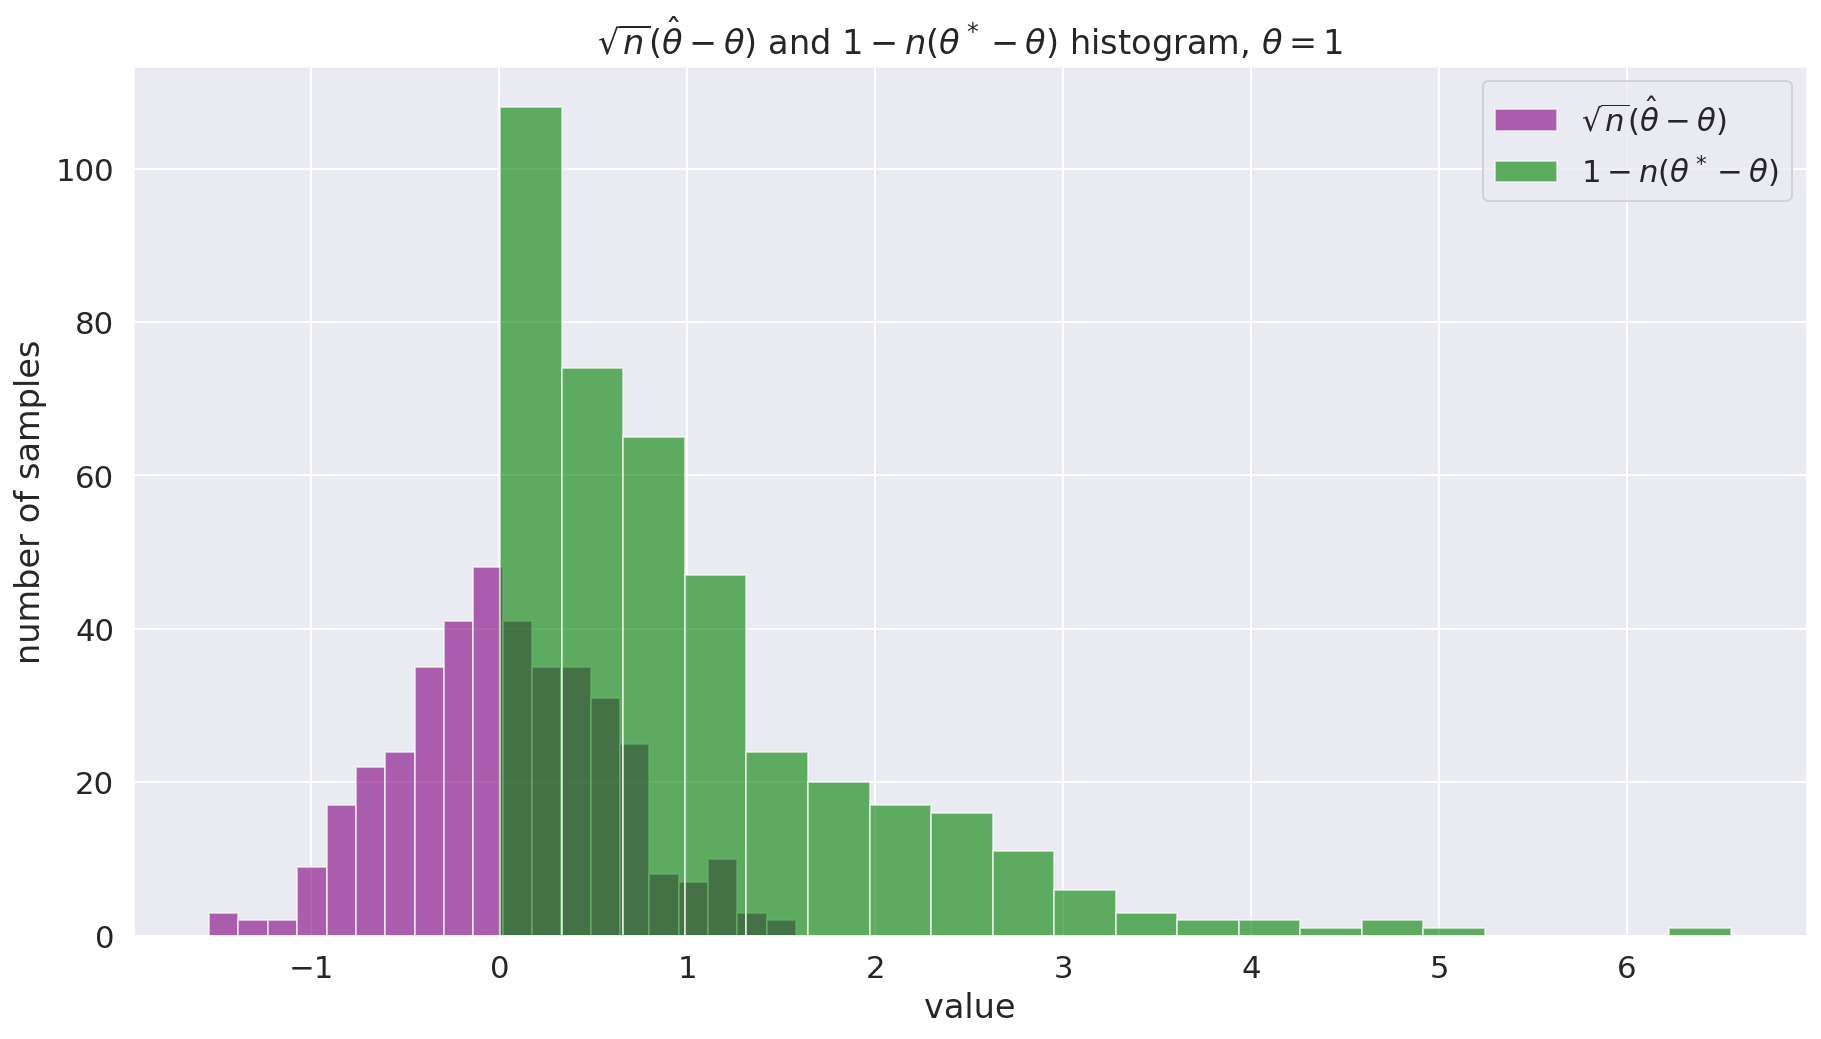

In [ ]:
plt.figure(figsize=(15, 8))
plt.title(r"$\sqrt{n} (\hat\theta - \theta)$" + " and " + r"$1 - n  (\theta^* - \theta)$" + " histogram, " + r"$\theta = 1$")
plt.hist(stat1, alpha=0.6, color="purple", bins=20, label=r'$\sqrt{n} (\hat\theta - \theta)$')
plt.hist(stat2, alpha=0.6, color="green", bins=20, label=r'$1 - n  (\theta^* - \theta)$')
plt.legend()
plt.xlabel("value")
plt.ylabel("number of samples")
plt.show()

На какие распределения похожи получившиеся гистограммы?

**Ответ:** на нормальное для статистики $\sqrt{n} (\hat\theta - \theta)$ и экспоненциальное для $1 - n  (\theta^* - \theta)$

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле 
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**: $\frac{\theta^2}{3}$

Посчитайте значения статистики
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$
для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

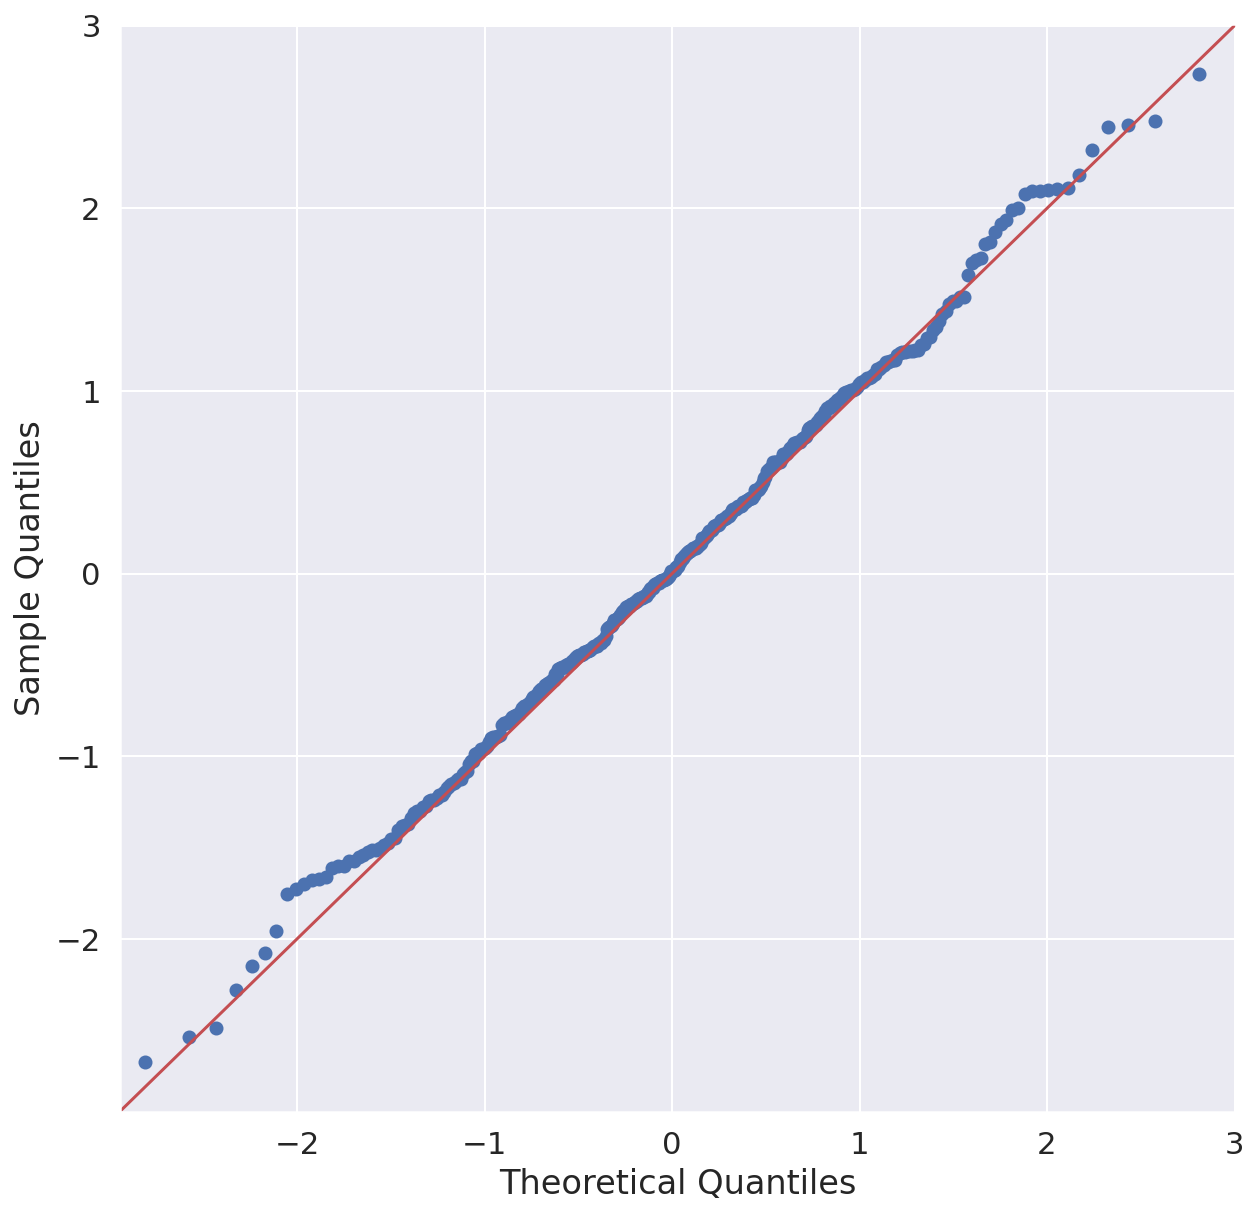

In [ ]:
import statsmodels.api as sm


theta_norm = stat1 * 3**0.5  
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(theta_norm, line='45', ax=ax)
fig.show()

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:** Можно, точки очень близки к прямой

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:** экспоненциальное (совпадает с результатами выше)

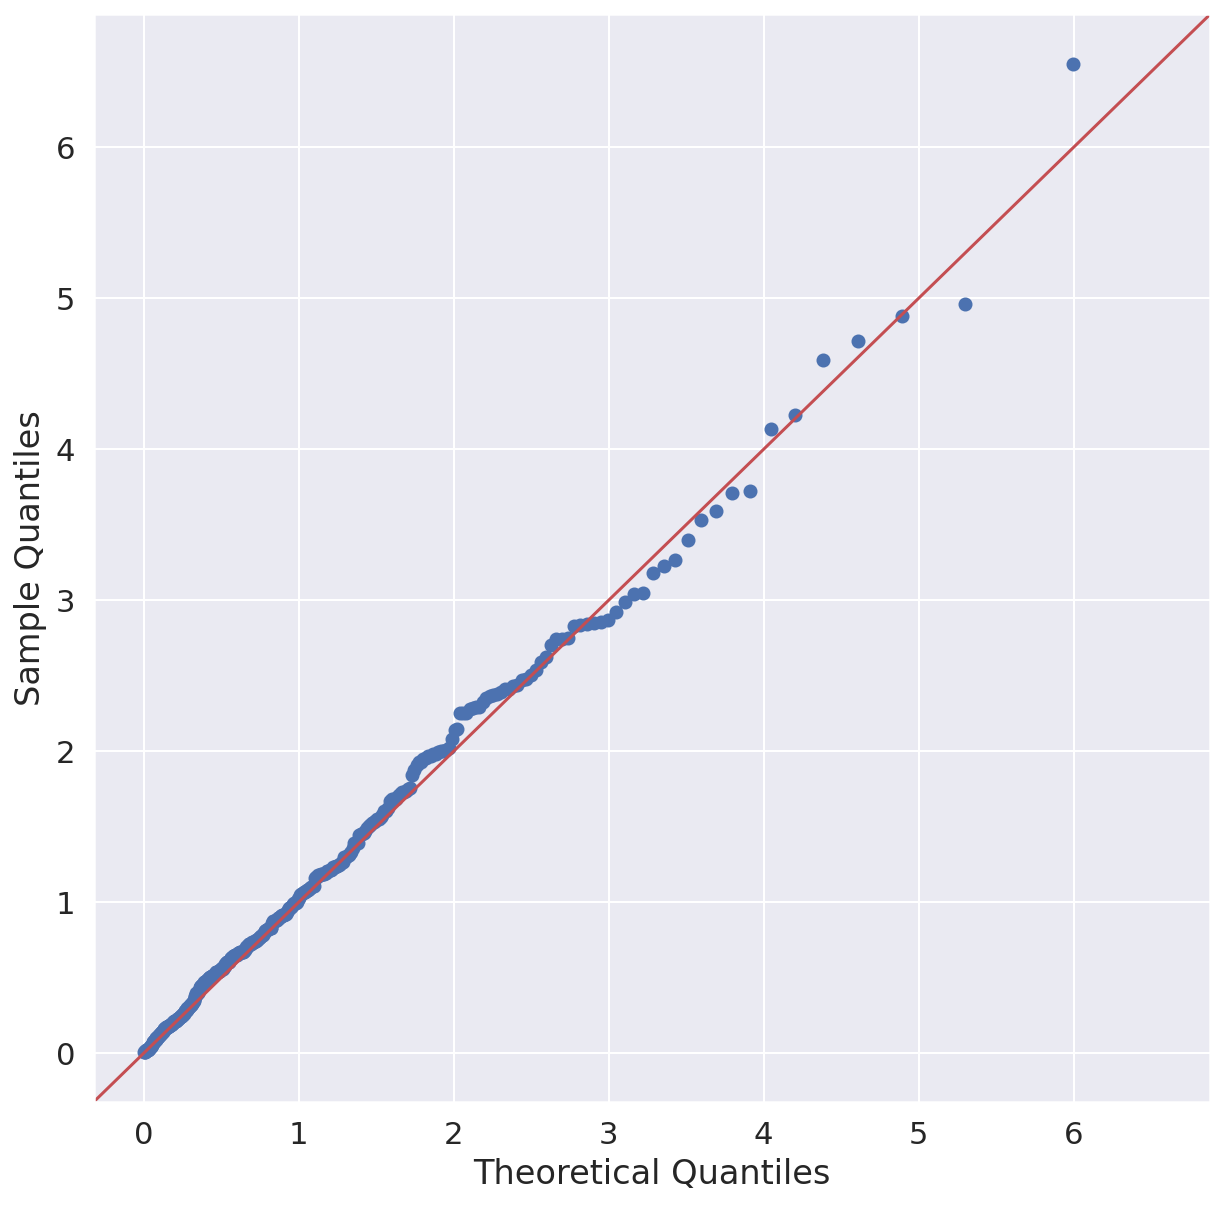

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
sm.qqplot(stat2, line='45', ax=ax, dist=sps.expon)
fig.show()

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:** Оценка $2\overline{X}$ сходится быстрее, чем $\frac{n+1}{n}  X_{(n)}$. Однако, как видно из первой гистограммы, $\frac{n+1}{n}  X_{(n)}$ оценивает $\theta$ лучше (гораздо большее количество выборок дает значение оценки близкое к истинному)

## Важно

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.